<a href="https://colab.research.google.com/github/Aakruthi006/Analysis-on-predicting-diabetes-using-ML/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import files

# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
display(df['Pregnancies'].unique())

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [ ]:
display(df['BloodPressure'].unique())

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [ ]:
display(df['SkinThickness'].unique())

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [ ]:
display(df['Insulin'].unique())

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [ ]:
display(df['BMI'].unique())

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [ ]:
display(df['DiabetesPedigreeFunction'].unique())

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [ ]:
display(df['Age'].unique())

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [ ]:
display(df['Outcome'].unique())

array([1, 0])

In [ ]:
display(df['Glucose'].unique())

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [ ]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

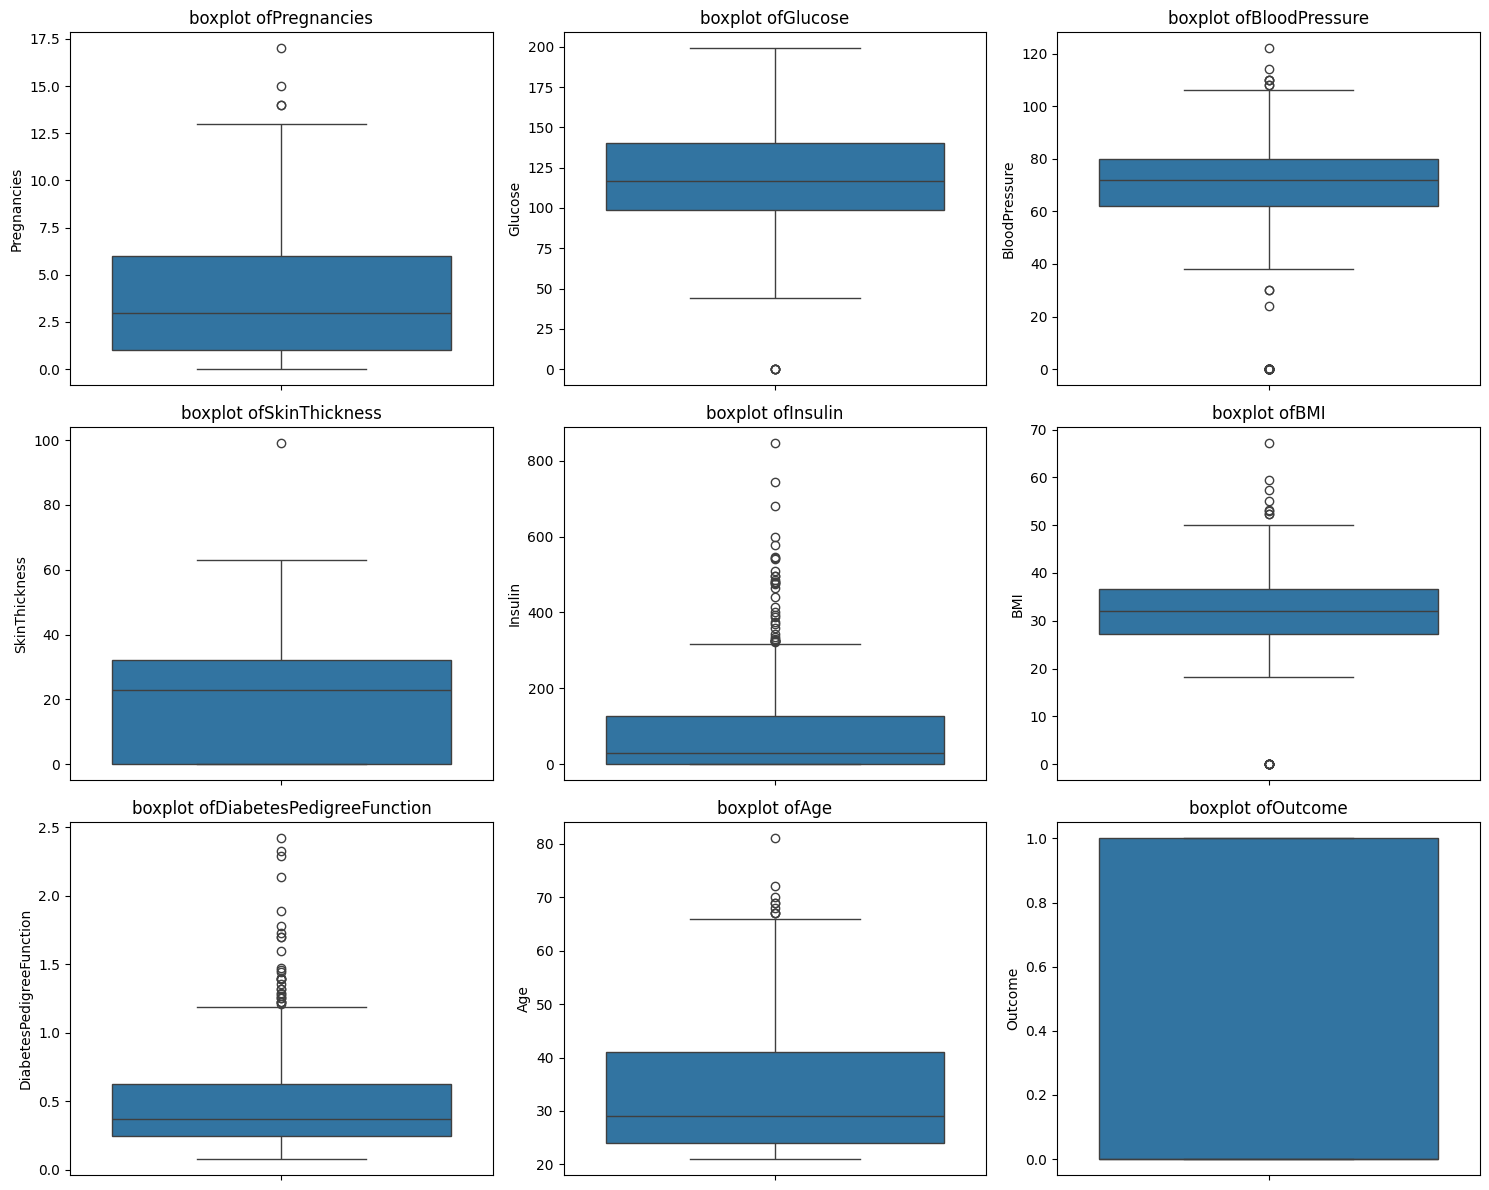

In [ ]:
cols=df.select_dtypes(include=['int64','float64']).columns
num_cols=len(cols)
num_rows=(num_cols+2)//3
fig,axes=plt.subplots(num_rows,3,figsize=(15,num_rows*4))
axes=axes.flatten()
for i,col in enumerate(cols):
  sns.boxplot(y=df[col],ax=axes[i])
  axes[i].set_title(f'boxplot of{col}')
for j in range(i+1,len(axes)):
  fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


In [ ]:
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3-q1
iqr
df_clean = df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]
df_clean

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[639 rows x 9 columns]

In [ ]:
df.shape[0]-df_clean.shape[0]

129

In [ ]:
df=df_clean
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[639 rows x 9 columns]

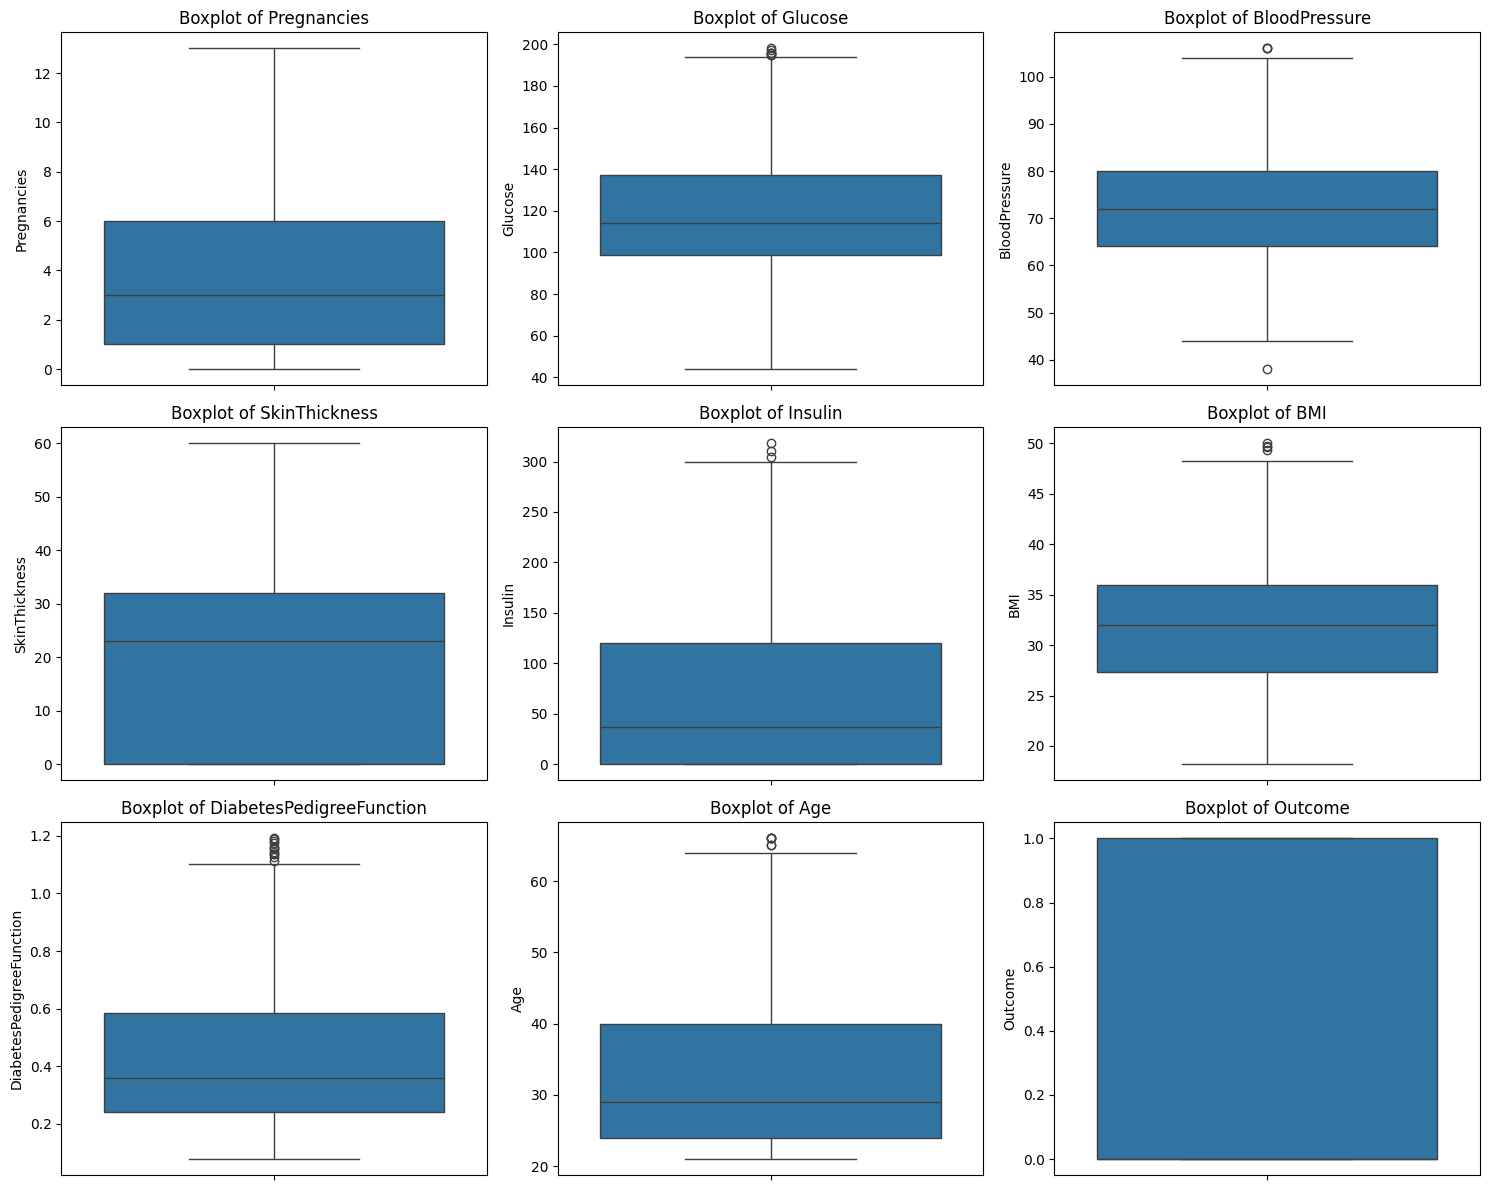

In [ ]:
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_clean[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('diabetes.csv', index=False)

# EDA

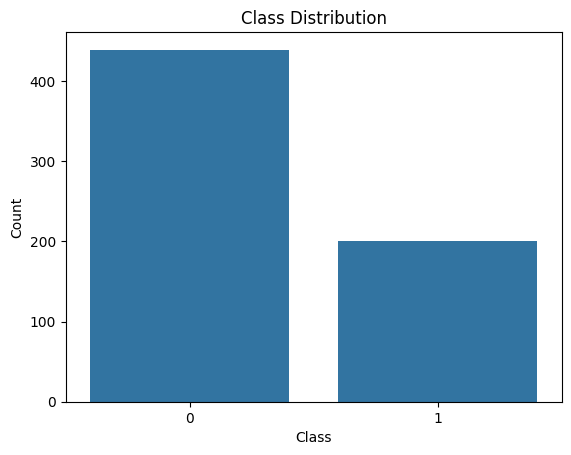

In [ ]:
#Bar Plot
sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

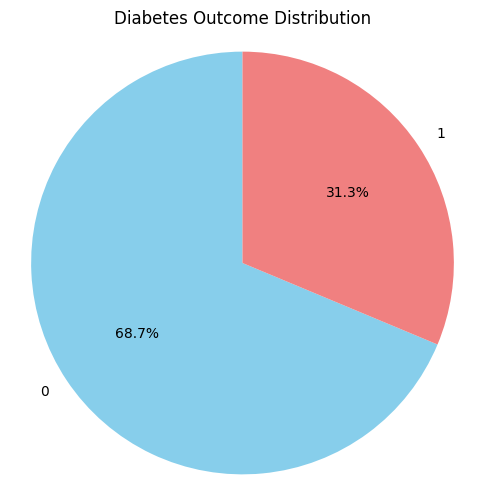

In [ ]:
#Pie Chart
labels = df['Outcome'].value_counts().index
sizes = df['Outcome'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Diabetes Outcome Distribution")
plt.axis('equal')
plt.show()

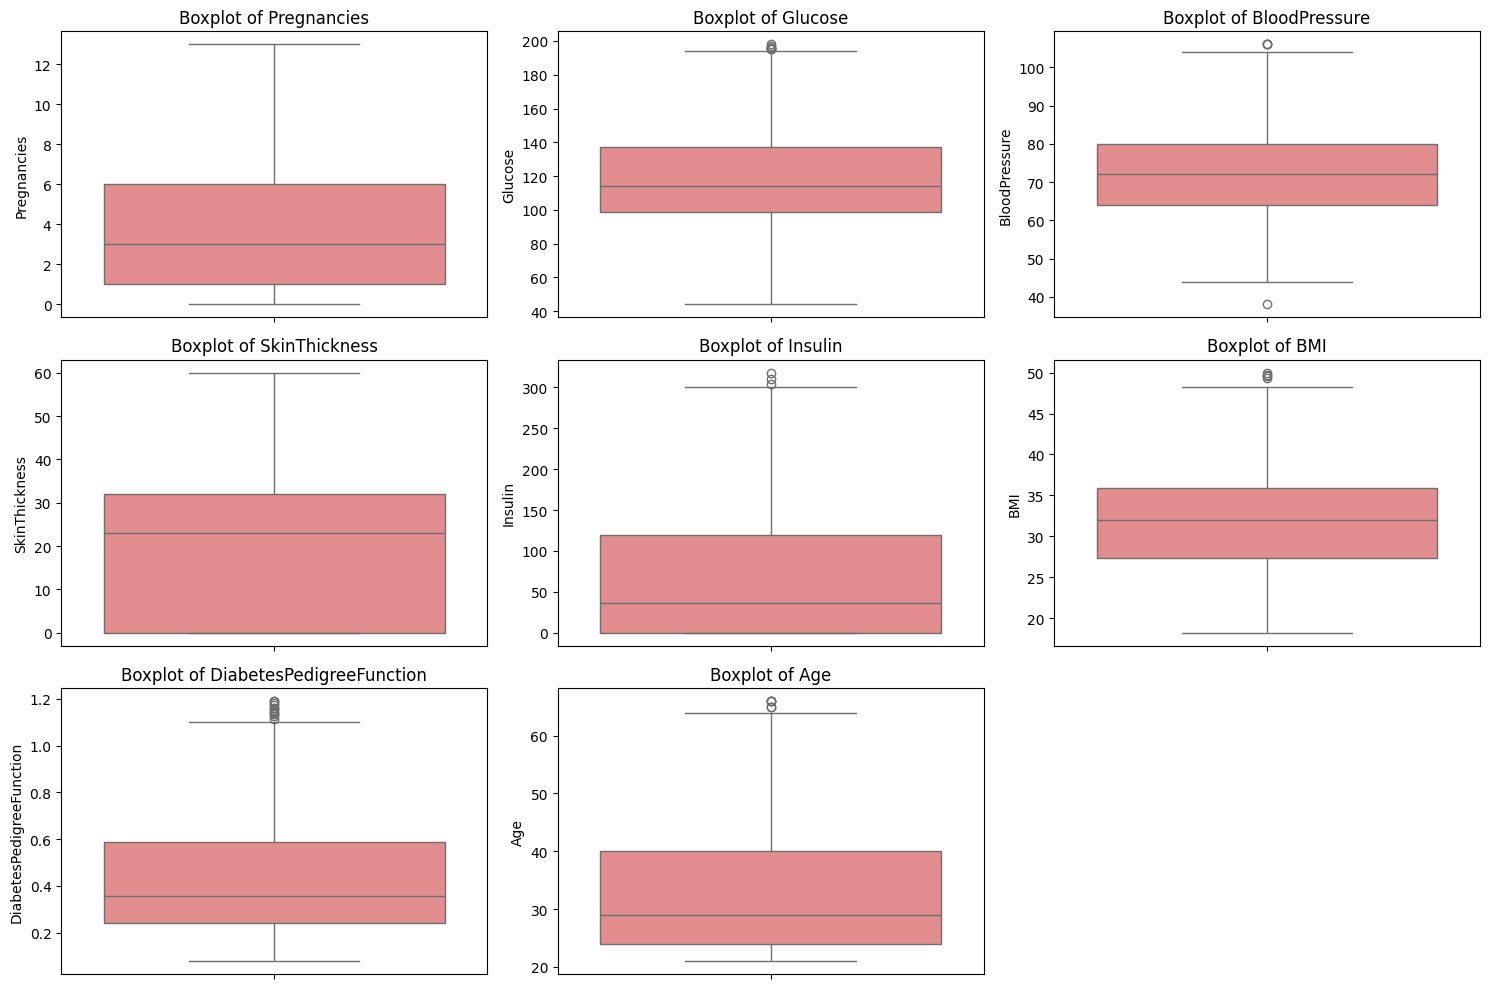

In [ ]:
#Boxplot
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column, color='lightcoral')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

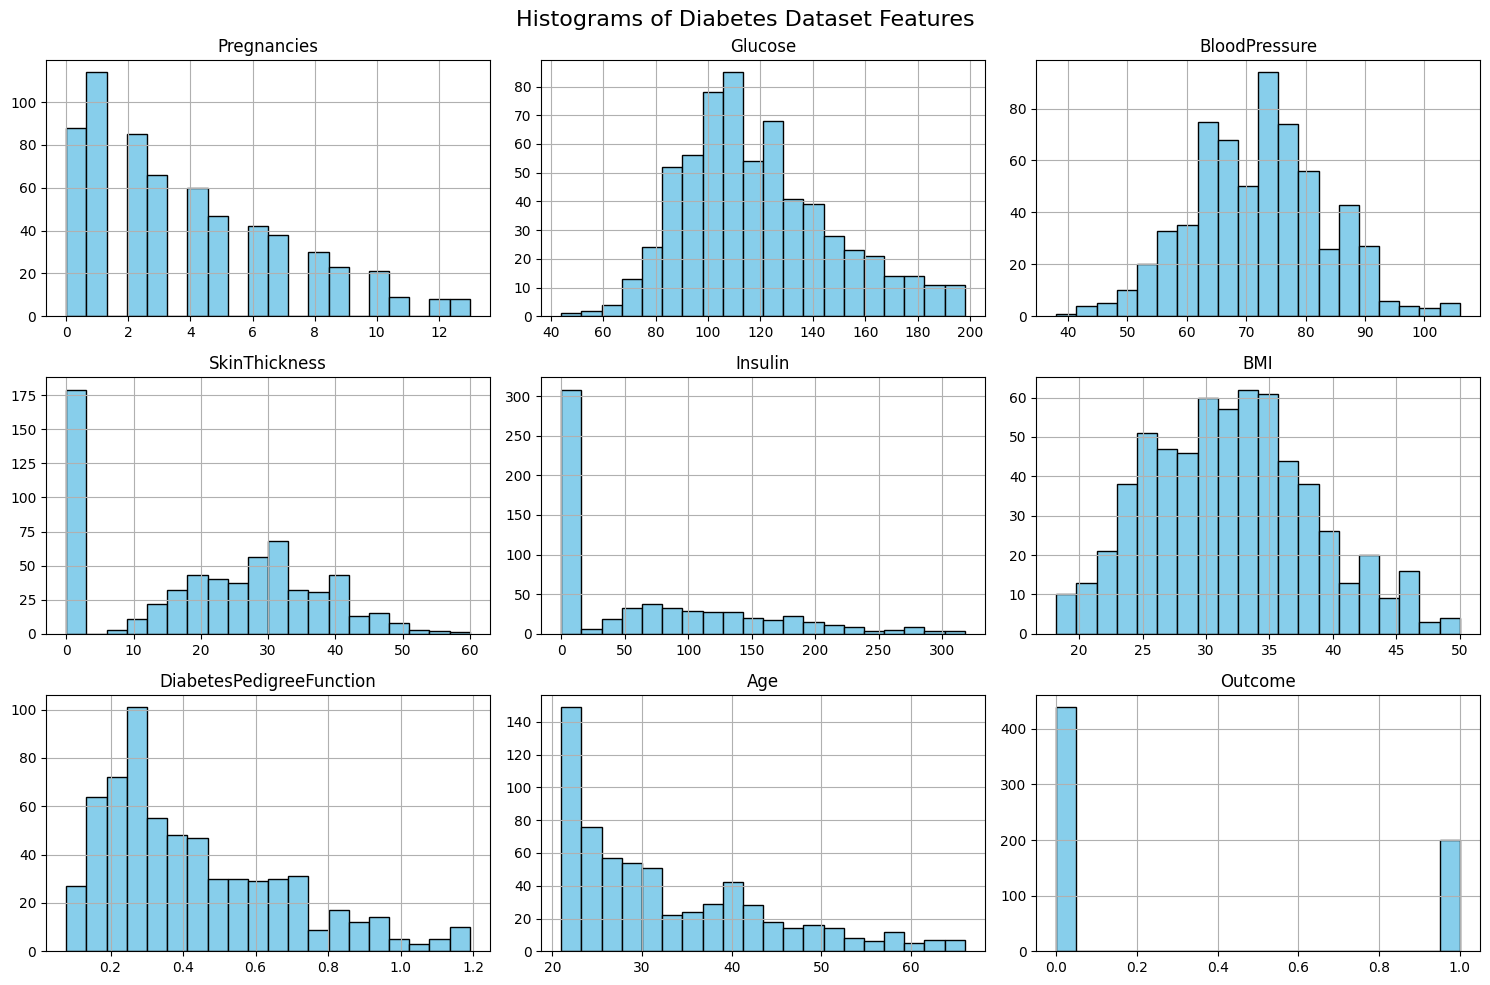

In [ ]:
#Histogram
df.hist(bins=20, figsize=(15, 10), edgecolor='black', color='skyblue')
plt.suptitle('Histograms of Diabetes Dataset Features', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


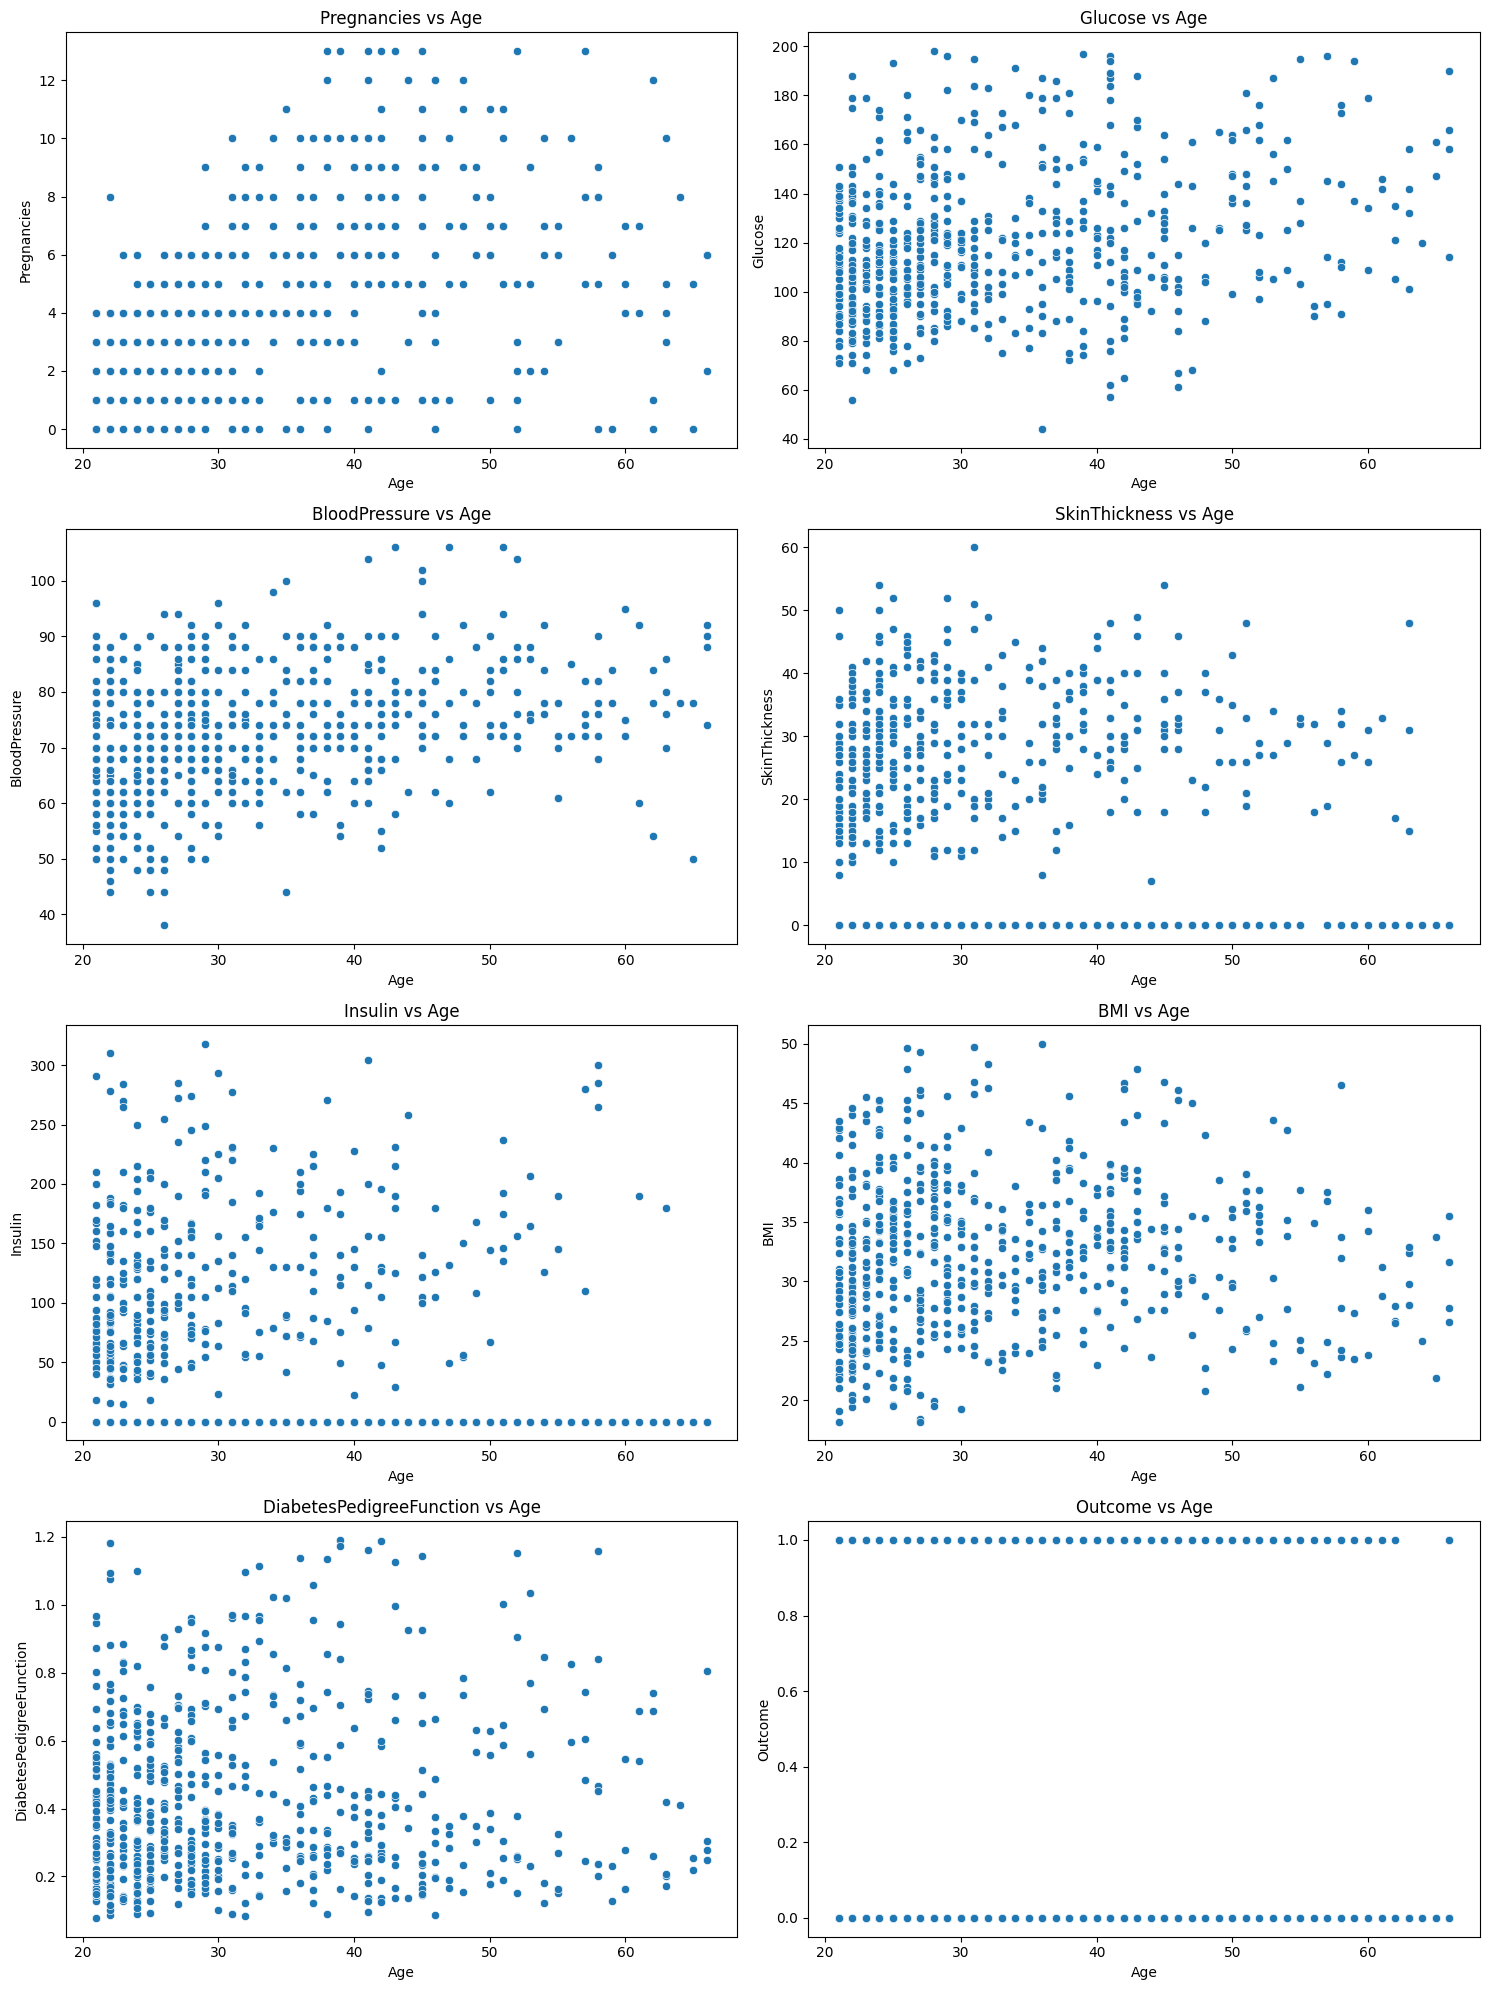

In [ ]:
#Scatter plot
plt.figure(figsize=(15, 20))
features = df.columns.drop('Age')


for i, col in enumerate(features):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(x='Age', y=col, data=df)
    plt.title(f'{col} vs Age')
    plt.xlabel('Age')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

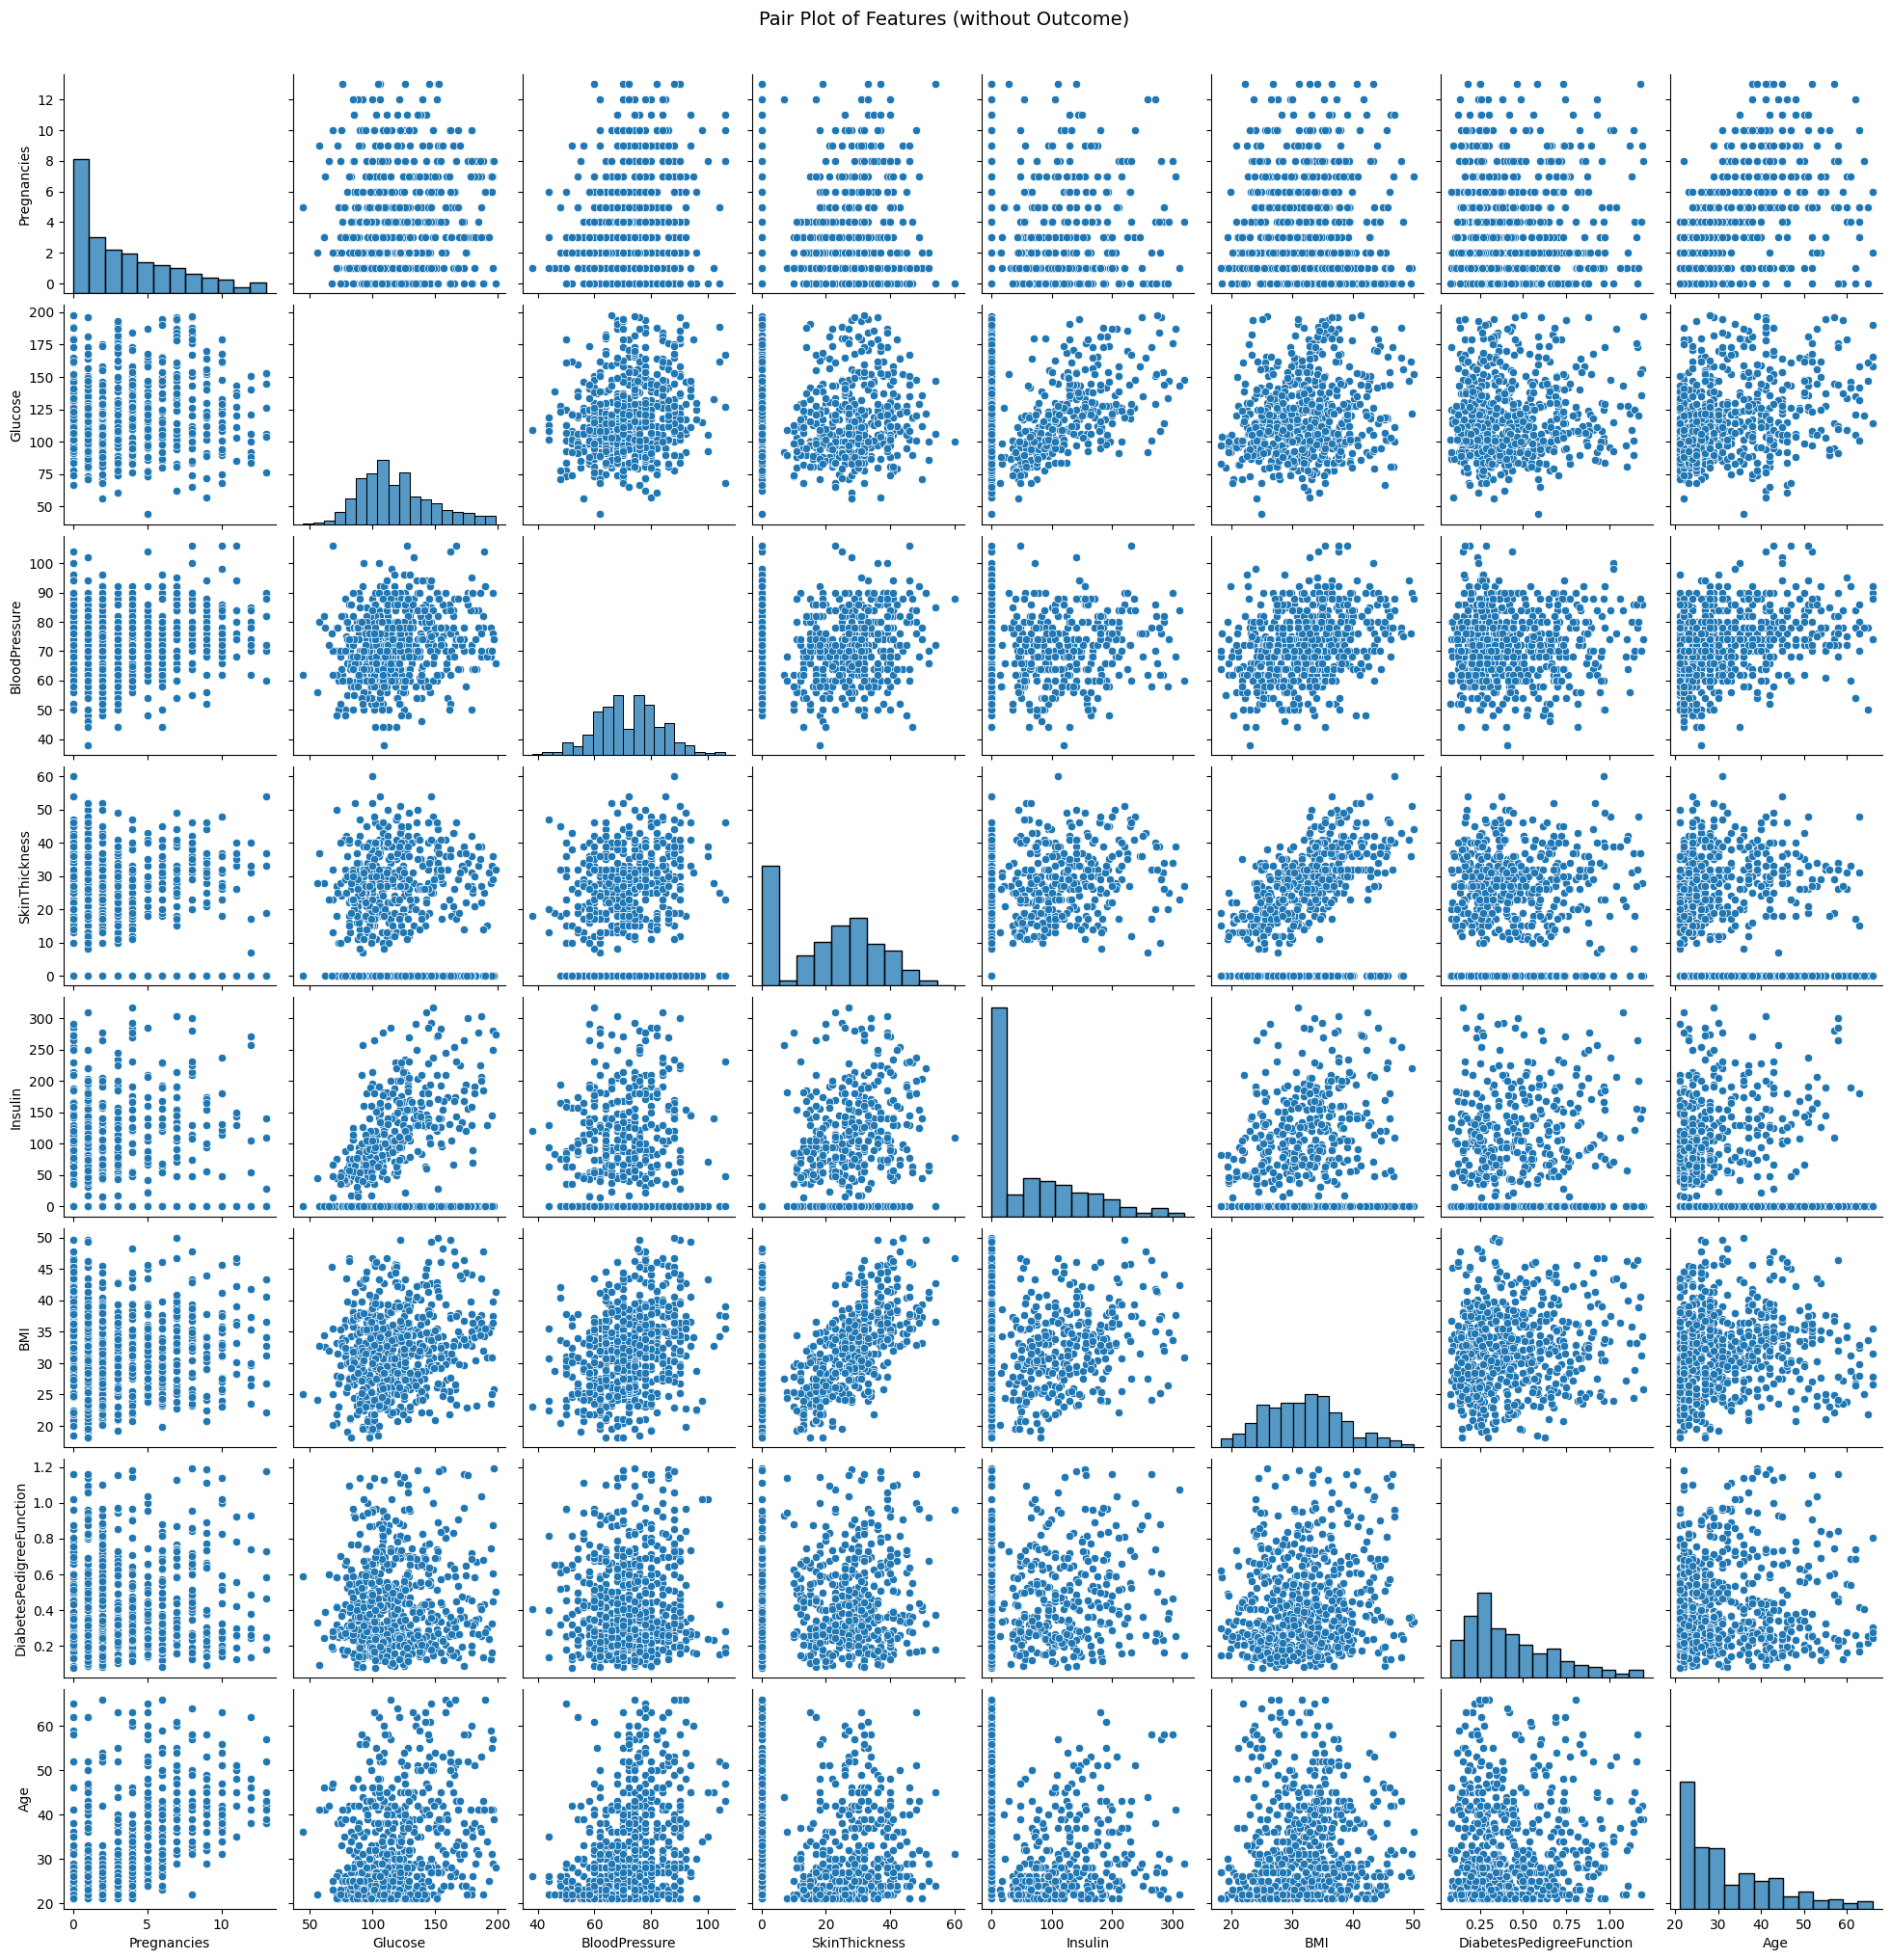

In [ ]:
#Pairplot
features = df.columns.drop('Outcome')

sns.pairplot(
    data=df[features],
)

plt.suptitle("Pair Plot of Features (without Outcome)", y=1.02, fontsize=14)
plt.show()

/tmp/ipython-input-3567954314.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette='viridis')
/tmp/ipython-input-3567954314.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette='viridis')
/tmp/ipython-input-3567954314.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, ax=axes[i], palette='viridis')
/tmp/ipython-input-3567954314.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

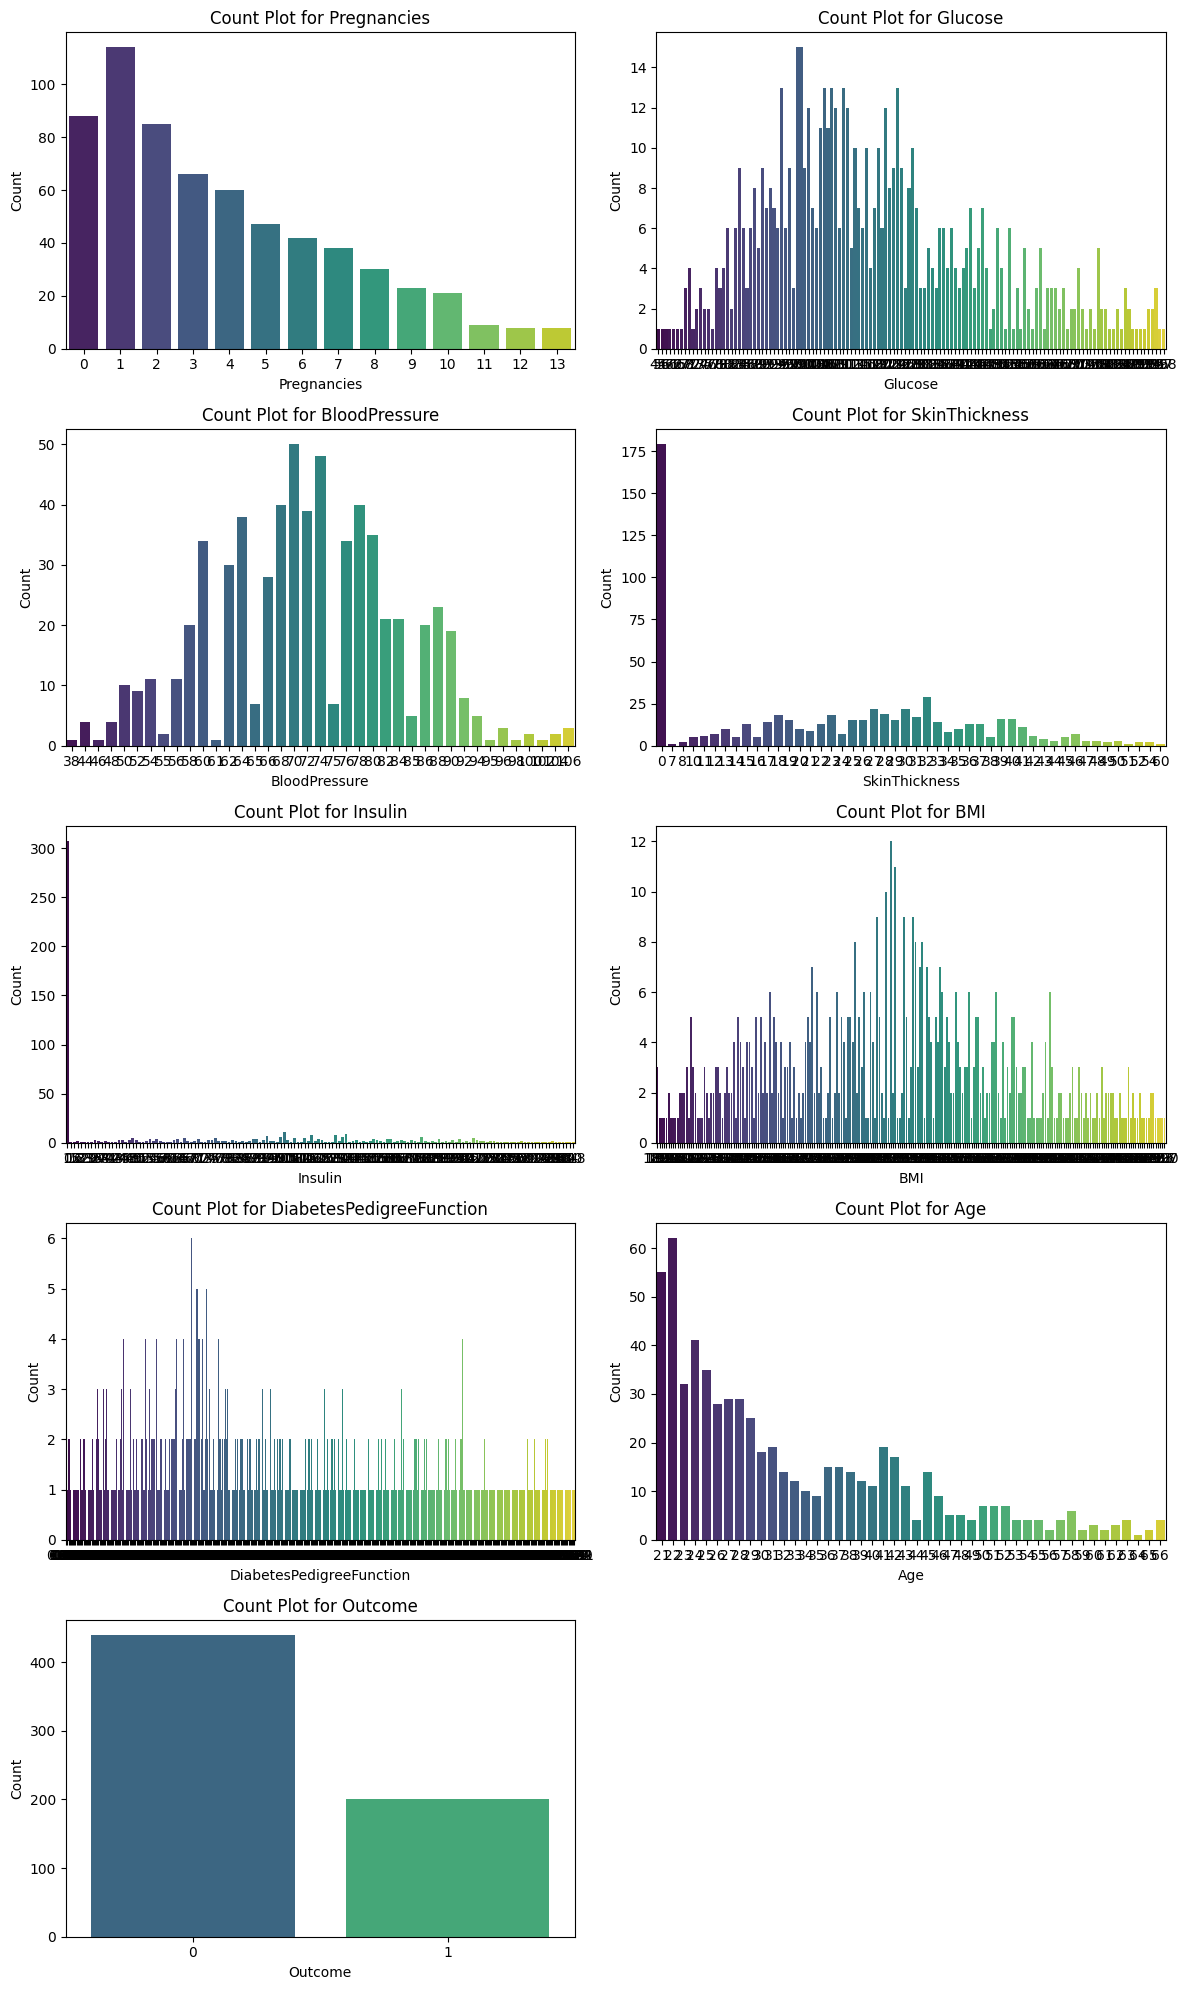

In [ ]:
#Count plot
num_columns = df.shape[1]
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 4))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.countplot(x=column, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f"Count Plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")

if num_columns % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

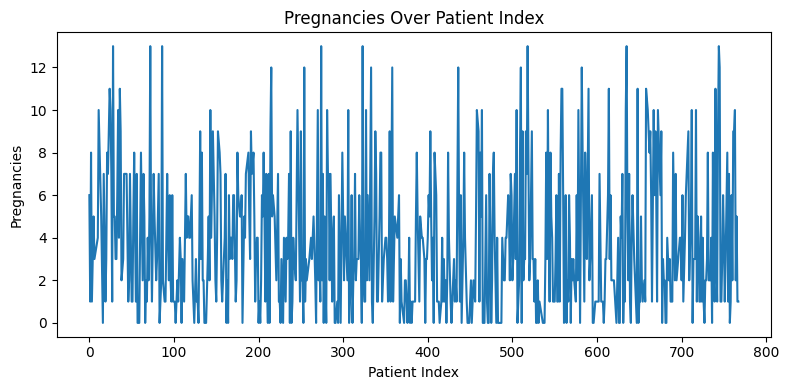

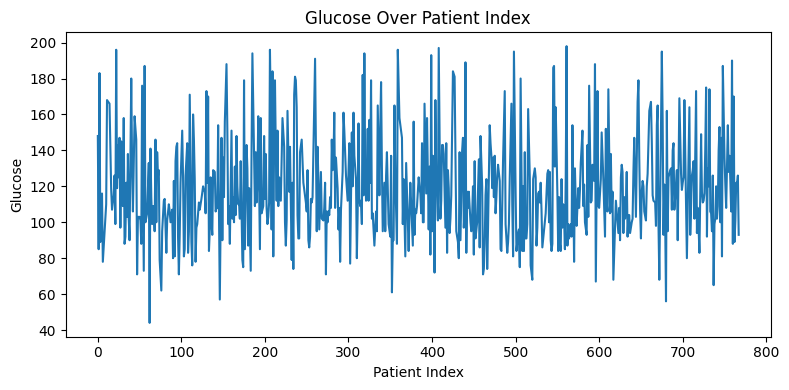

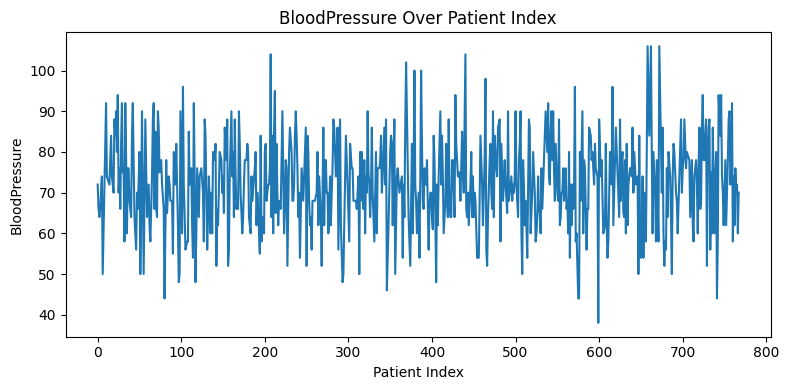

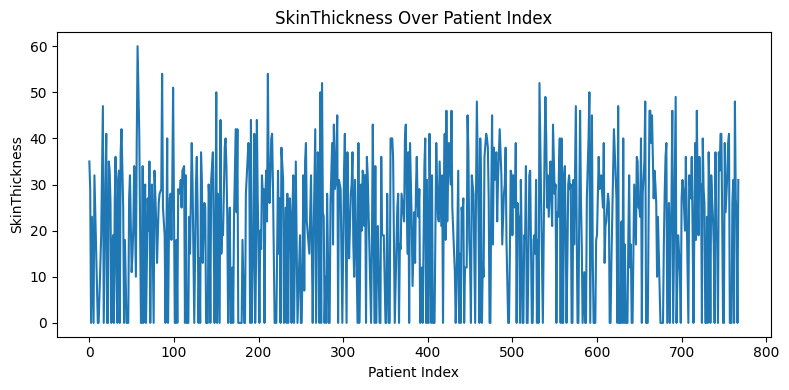

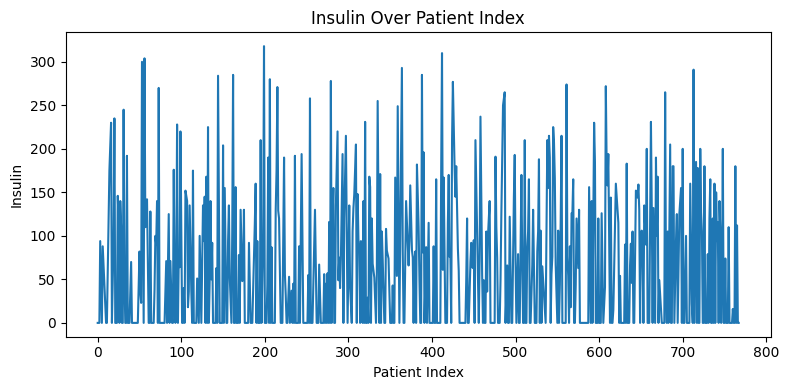

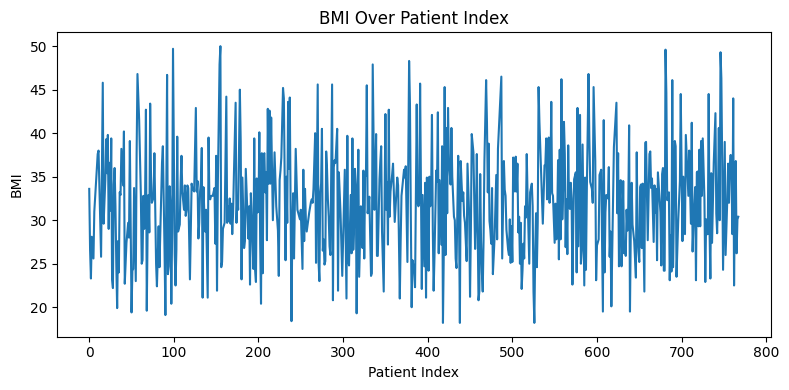

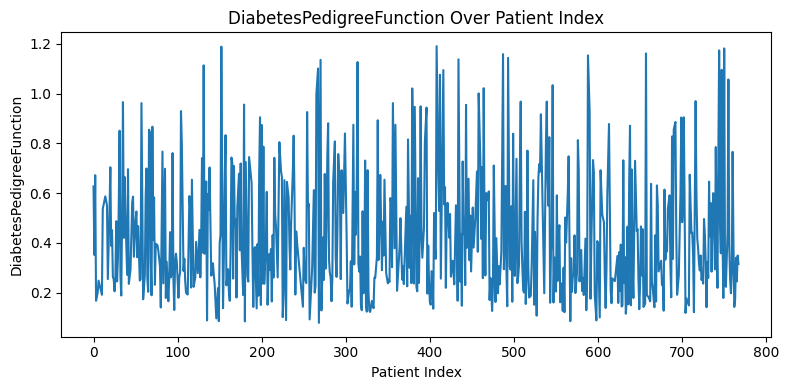

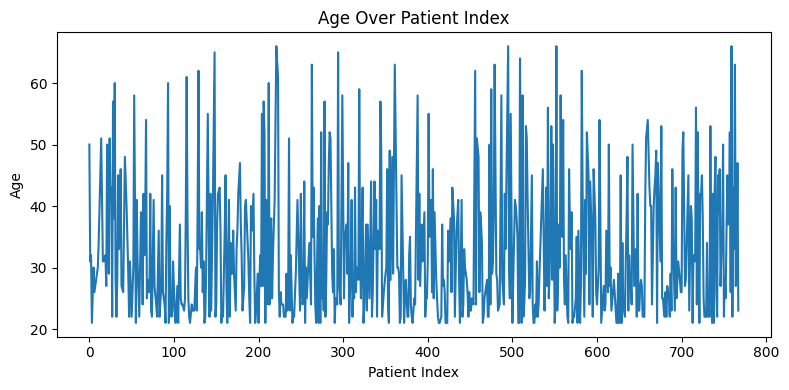

In [ ]:
#Lineplot

features = df.columns.drop('Outcome')

for col in features:
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=df.index, y=df[col])
    plt.title(f'{col} Over Patient Index')
    plt.xlabel("Patient Index")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

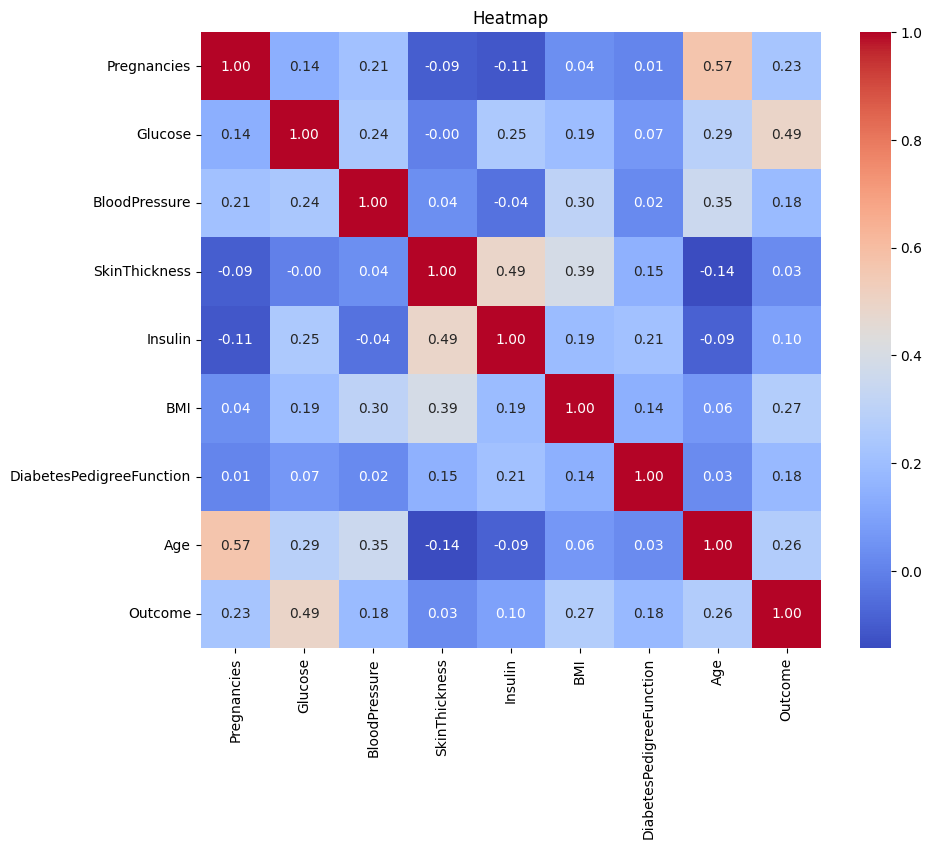

In [ ]:
#Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap")
plt.show()

# Logistic Regression

In [ ]:
X=df.drop(['Outcome'],axis=1)

print(X)
y = df['Outcome']
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state = 42)

In [ ]:
# fit a logistic regression model and store the class predictions
#70-30
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print(predictions)

[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
z=confusion_matrix(y_test, predictions)
z

array([[125,   7],
       [ 30,  30]])

Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8072916666666666

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.796875

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[125,   7],
       [ 32,  28]])

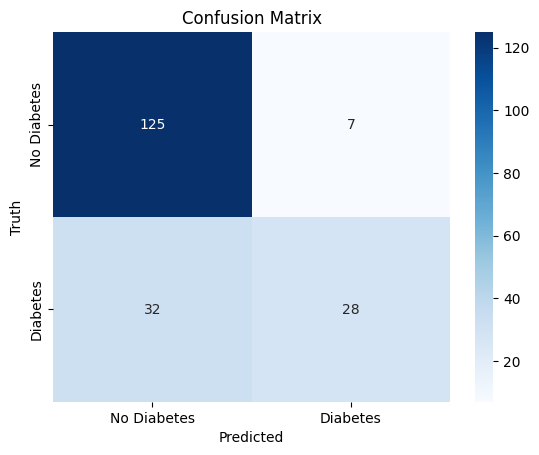

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       132
           1       0.81      0.50      0.62        60

    accuracy                           0.81       192
   macro avg       0.81      0.72      0.74       192
weighted avg       0.81      0.81      0.79       192



# SVM_Classifier

In [ ]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
x

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
5                       0.201   30  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[639 rows x 8 columns]

In [ ]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#70-30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3, random_state= 46)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
svm

Predicted  Actual
642          1       1
475          0       0
573          0       0
149          0       0
268          0       0
..         ...     ...
273          0       0
166          0       0
605          0       0
635          0       1
68           0       0

[192 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8333333333333334

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[132,  10],
       [ 22,  28]])

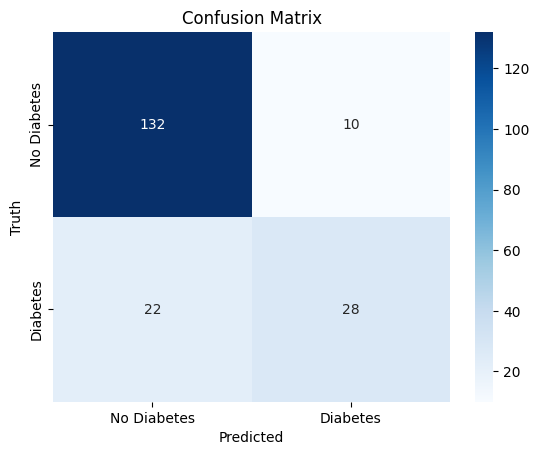

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       142
           1       0.74      0.56      0.64        50

    accuracy                           0.83       192
   macro avg       0.80      0.74      0.76       192
weighted avg       0.83      0.83      0.83       192



# KNN_Classifier

In [ ]:
x = df.drop(['Outcome'], axis=1)
y=df['Outcome']
x

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
5                       0.201   30  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[639 rows x 8 columns]

In [ ]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#70-30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3, random_state= 46)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
knn

Predicted  Actual
642          1       1
475          0       0
573          0       0
149          0       0
268          0       0
..         ...     ...
273          0       0
166          0       0
605          0       0
635          0       1
68           0       0

[192 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8333333333333334

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[130,  12],
       [ 20,  30]])

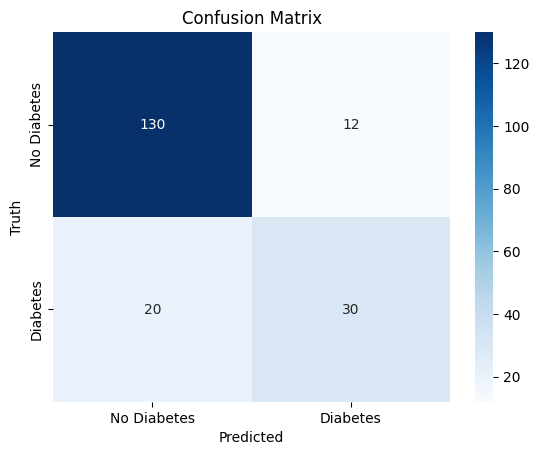

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       142
           1       0.71      0.60      0.65        50

    accuracy                           0.83       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.83      0.83      0.83       192



# Decision Tree_Classifier

In [ ]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
x

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
5                       0.201   30  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[639 rows x 8 columns]

In [ ]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#70-30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3, random_state= 46)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted  Actual
642          0       1
475          0       0
573          0       0
149          0       0
268          0       0
..         ...     ...
273          0       0
166          0       0
605          1       0
635          0       1
68           0       0

[192 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7135416666666666

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[108,  34],
       [ 21,  29]])

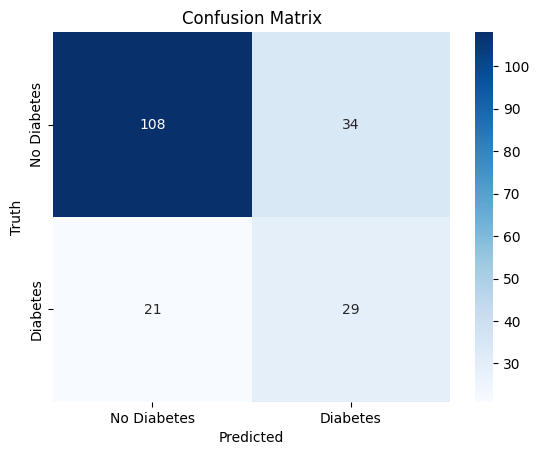

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       142
           1       0.46      0.58      0.51        50

    accuracy                           0.71       192
   macro avg       0.65      0.67      0.66       192
weighted avg       0.74      0.71      0.72       192



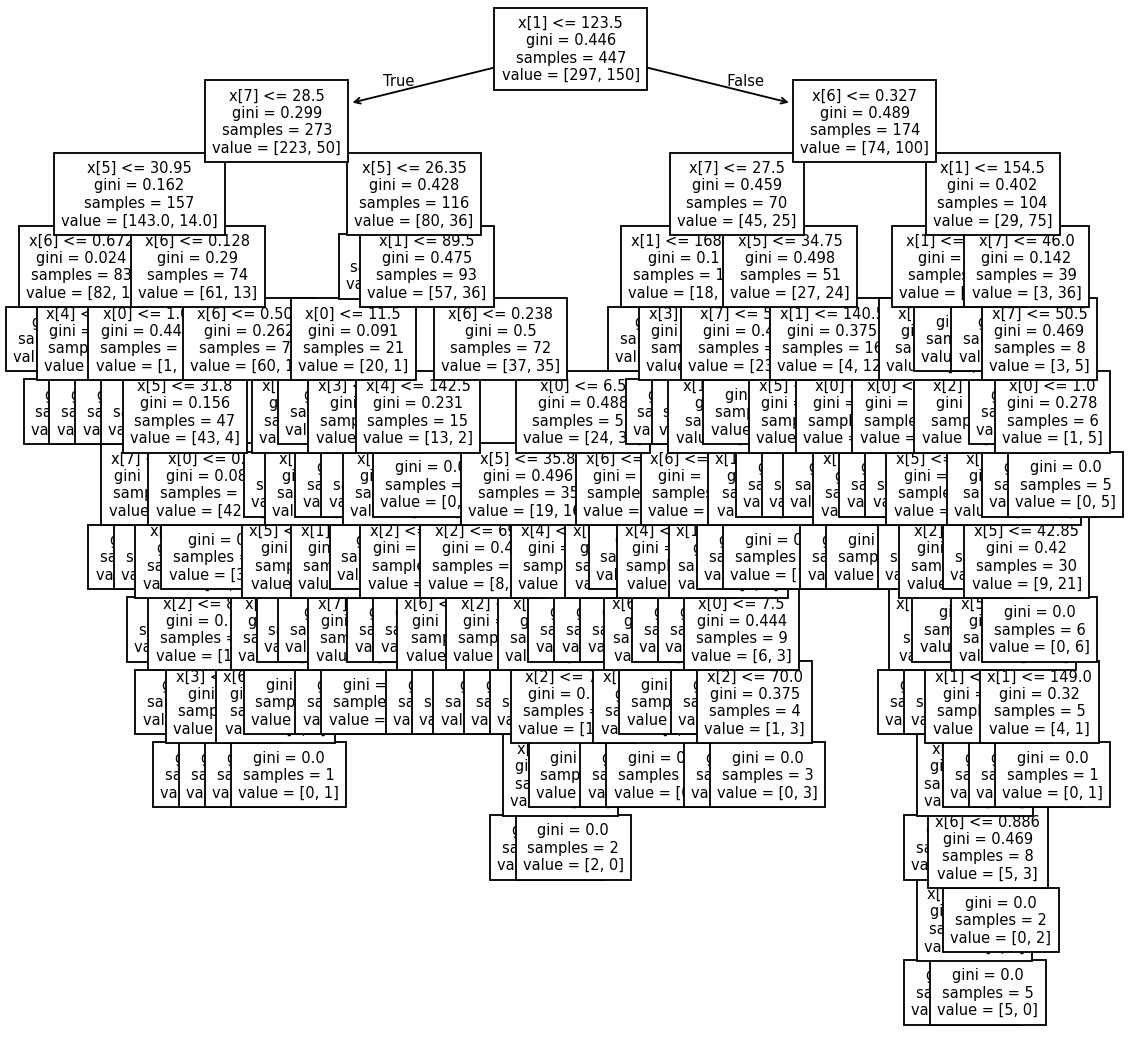

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10), dpi=132)
plot_tree(model, fontsize=8)
plt.show()

Decision Tree Classifier Parameter

In [ ]:
# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3) # 'gini', 'log_loss', 'entropy'

# Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7447916666666666

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[123,  19],
       [ 30,  20]])

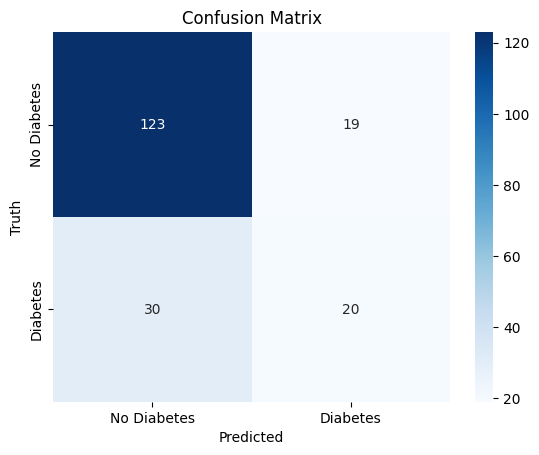

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       142
           1       0.51      0.40      0.45        50

    accuracy                           0.74       192
   macro avg       0.66      0.63      0.64       192
weighted avg       0.73      0.74      0.73       192



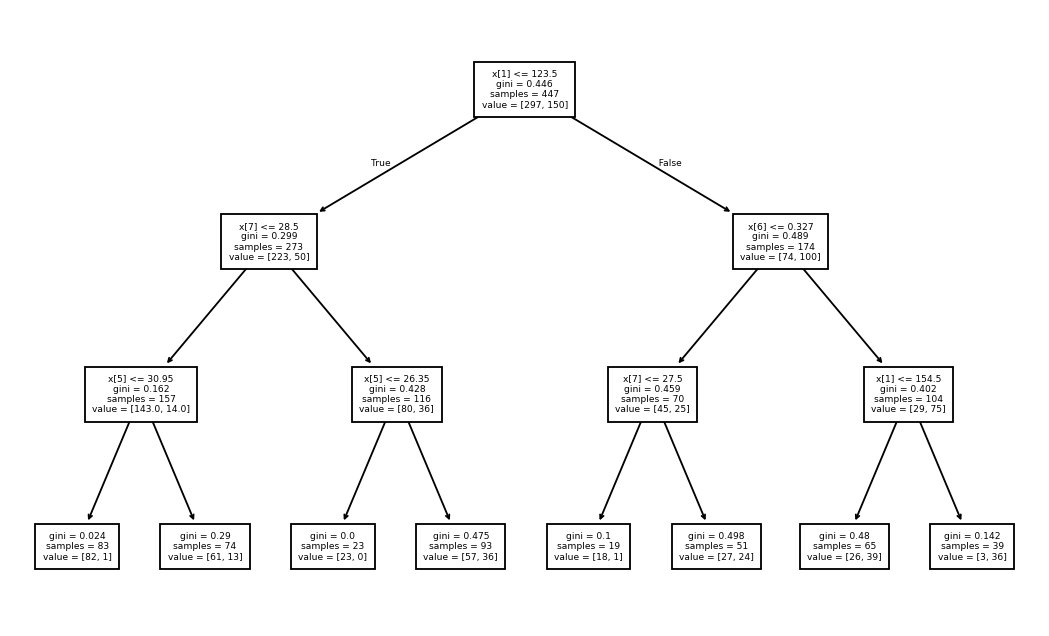

In [ ]:
plt.figure(figsize=(10, 6), dpi=132)
plot_tree(clf, fontsize=5)
plt.show()

# Random Forest_Classifier

In [ ]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
x

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
5                       0.201   30  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[639 rows x 8 columns]

In [ ]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#70-30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3, random_state= 46)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted  Actual
642          0       1
475          0       0
573          0       0
149          0       0
268          0       0
..         ...     ...
273          0       0
166          0       0
605          0       0
635          0       1
68           0       0

[192 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8020833333333334

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[124,  18],
       [ 20,  30]])

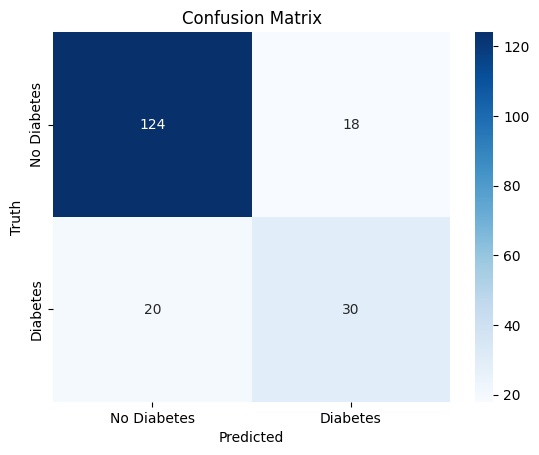

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       142
           1       0.62      0.60      0.61        50

    accuracy                           0.80       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.80      0.80      0.80       192



Random Forest Classifier Parameter

In [ ]:
# Create Random Forest Classifier object
clf = RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=10, bootstrap=True) # 'gini', 'log_loss', 'entropy'

# Train Random Forest Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8177083333333334

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[126,  16],
       [ 19,  31]])

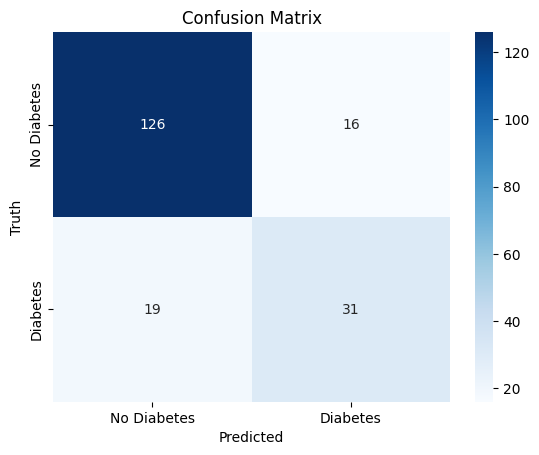

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       142
           1       0.66      0.62      0.64        50

    accuracy                           0.82       192
   macro avg       0.76      0.75      0.76       192
weighted avg       0.81      0.82      0.82       192



# Bagging_Classifier

In [ ]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
x

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
5                       0.201   30  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[639 rows x 8 columns]

In [ ]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#70-30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3, random_state= 46)

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
model = BaggingClassifier()

In [ ]:
model.fit(x_train, y_train)

BaggingClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted  Actual
642          0       1
475          0       0
573          0       0
149          0       0
268          0       0
..         ...     ...
273          0       0
166          0       0
605          1       0
635          0       1
68           0       0

[192 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7916666666666666

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[128,  14],
       [ 26,  24]])

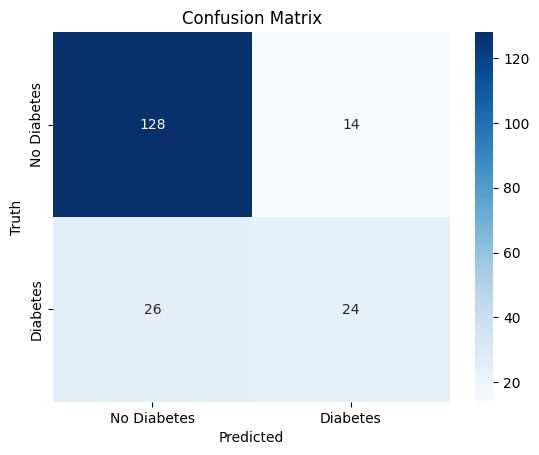

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       142
           1       0.63      0.48      0.55        50

    accuracy                           0.79       192
   macro avg       0.73      0.69      0.71       192
weighted avg       0.78      0.79      0.78       192



Bagging Classifier Parameter

In [ ]:
# Create Bagging Classifier object
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=32)
br = BaggingClassifier(estimator=base_estimator, n_estimators=20, bootstrap=True)

# Train Bagging Classifier
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8541666666666666

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[139,   3],
       [ 25,  25]])

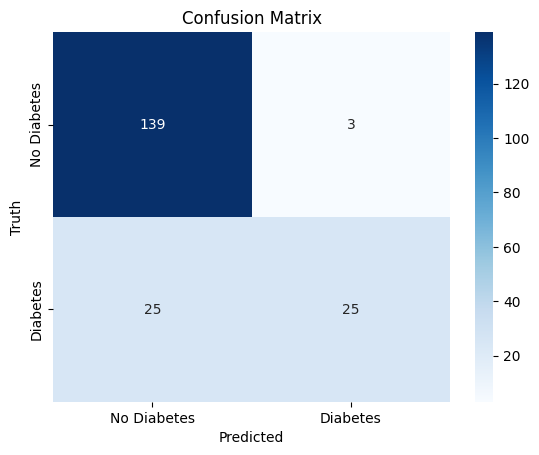

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       142
           1       0.89      0.50      0.64        50

    accuracy                           0.85       192
   macro avg       0.87      0.74      0.77       192
weighted avg       0.86      0.85      0.84       192



# Boosting_Classifier

In [ ]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
x

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
5                       0.201   30  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[639 rows x 8 columns]

In [ ]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#70-30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3, random_state= 46)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier()

In [ ]:
model.fit(x_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted  Actual
642          0       1
475          0       0
573          0       0
149          0       0
268          0       0
..         ...     ...
273          0       0
166          1       0
605          1       0
635          0       1
68           0       0

[192 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8020833333333334

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[124,  18],
       [ 20,  30]])

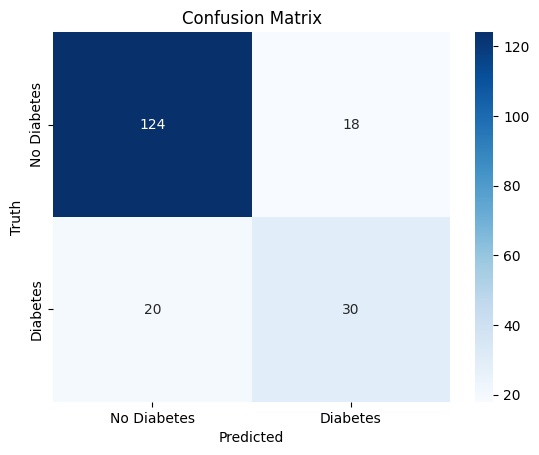

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       142
           1       0.62      0.60      0.61        50

    accuracy                           0.80       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.80      0.80      0.80       192



ADABoosting Classifier Parameter

In [ ]:
# Create Boosting Classifier object
from sklearn.ensemble import RandomForestClassifier
base_estimator = RandomForestClassifier(max_depth=12, random_state=42)
br = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=0.05)

# Train Boosting Classifier
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8125

# GradientBoost_Classifer

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier()

In [ ]:
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted  Actual
642          0       1
475          0       0
573          0       0
149          0       0
268          0       0
..         ...     ...
273          0       0
166          0       0
605          1       0
635          0       1
68           0       0

[192 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7760416666666666

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[121,  21],
       [ 22,  28]])

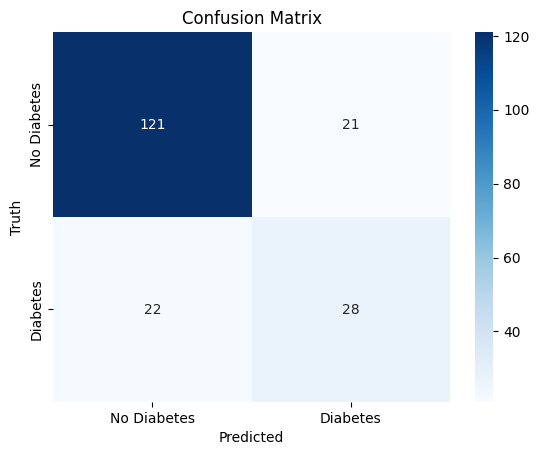

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       142
           1       0.57      0.56      0.57        50

    accuracy                           0.78       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.77      0.78      0.78       192



GradientBoosting Classifier Parameter

In [ ]:
# Create Boosting Classifier object
br = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, loss='exponential', criterion='squared_error') #'exponential', 'log_loss'

# Train Boosting Classifier
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7916666666666666

# XGBoost_Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()

In [ ]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
dt = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
dt

Predicted  Actual
642          0       1
475          0       0
573          0       0
149          0       0
268          0       0
..         ...     ...
273          0       0
166          0       0
605          1       0
635          0       1
68           0       0

[192 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7708333333333334

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[117,  25],
       [ 19,  31]])

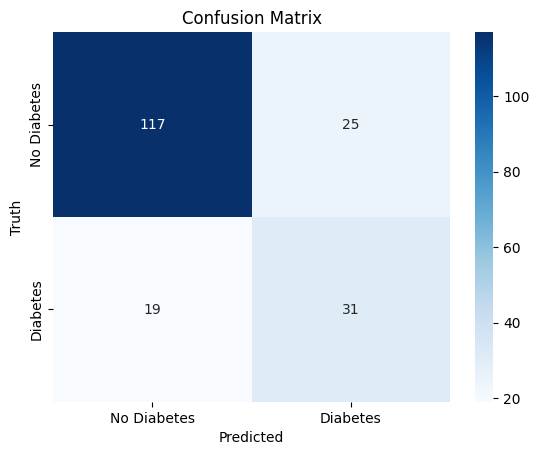

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       142
           1       0.55      0.62      0.58        50

    accuracy                           0.77       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.78      0.77      0.77       192



XGBoosting Classifier Parameter

In [ ]:
# Create Boosting Classifier object
br = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, n_jobs=-1)

# Train Boosting Classifier
br = br.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = br.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.78125

# Train,Test for 80-20

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:51:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:51:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


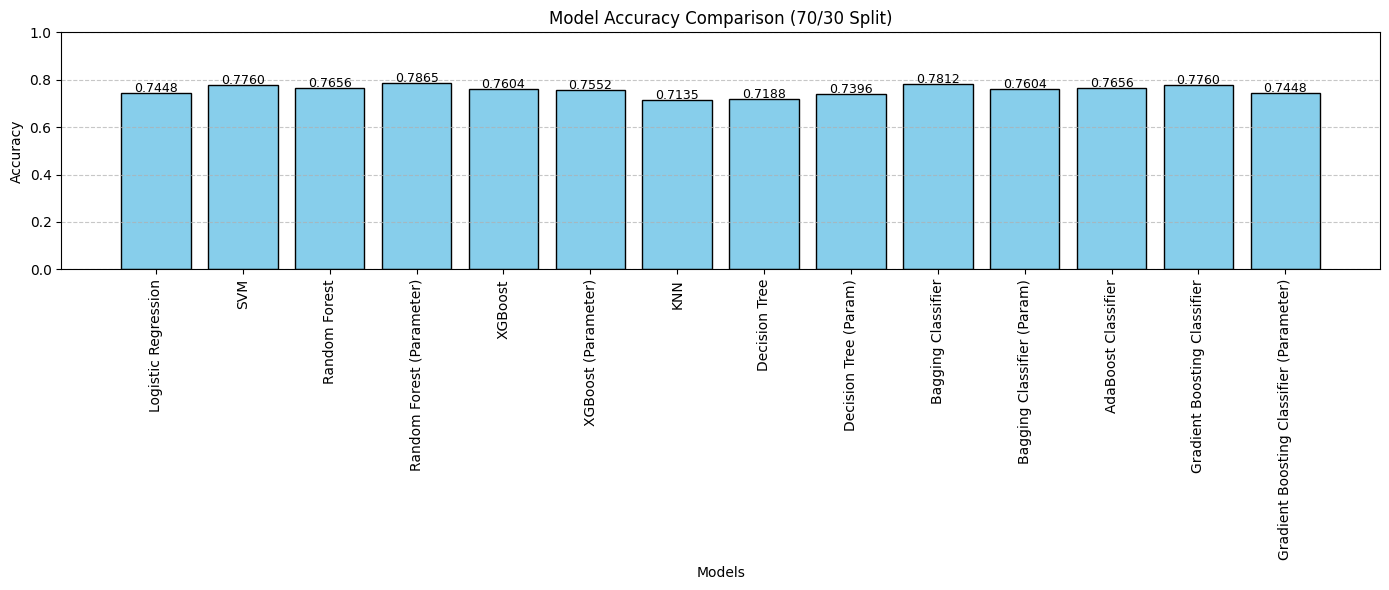

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf


RANDOM_STATE = 42
tf.random.set_seed(RANDOM_STATE)


X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)


model_accuracies = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
logreg.fit(X_train, y_train)
model_accuracies["Logistic Regression"] = accuracy_score(y_test, logreg.predict(X_test))

# Support Vector Machine (SVM)
from sklearn.svm import SVC

# SVM (Default, which is RBF kernel with C=1.0, gamma='scale')
svm = SVC(kernel='rbf', random_state=RANDOM_STATE)
svm.fit(X_train, y_train)
model_accuracies["SVM"] = accuracy_score(y_test, svm.predict(X_test))

# Random Forest (Default)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
model_accuracies["Random Forest"] = accuracy_score(y_test, rf.predict(X_test))

# Random Forest (Tuned)
rf_parameter = RandomForestClassifier(
    n_estimators=200, max_depth=10, min_samples_split=5, random_state=RANDOM_STATE
)
rf_parameter.fit(X_train, y_train)
model_accuracies["Random Forest (Parameter)"] = accuracy_score(y_test, rf_parameter.predict(X_test))

# XGBoost (Default)
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=RANDOM_STATE)
xgb.fit(X_train, y_train)
model_accuracies["XGBoost"] = accuracy_score(y_test, xgb.predict(X_test))

# XGBoost (Tuned)
xgb_parameter = XGBClassifier(
    n_estimators=300, max_depth=6, learning_rate=0.1, eval_metric='logloss',
    use_label_encoder=False, random_state=RANDOM_STATE
)
xgb_parameter.fit(X_train, y_train)
model_accuracies["XGBoost (Parameter)"] = accuracy_score(y_test, xgb_parameter.predict(X_test))

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
model_accuracies["KNN"] = accuracy_score(y_test, knn.predict(X_test))

# Decision Tree (Default)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)
model_accuracies["Decision Tree"] = accuracy_score(y_test, dt.predict(X_test))

# Decision Tree (Tuned)
dt_parameter = DecisionTreeClassifier(max_depth=8, min_samples_split=4, random_state=RANDOM_STATE)
dt_parameter.fit(X_train, y_train)
model_accuracies["Decision Tree (Param)"] = accuracy_score(y_test, dt_parameter.predict(X_test))

# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(random_state=RANDOM_STATE)
bag.fit(X_train, y_train)
model_accuracies["Bagging Classifier"] = accuracy_score(y_test, bag.predict(X_test))

# Bagging Classifier (Tuned)
bag_parameter = BaggingClassifier(n_estimators=150, random_state=RANDOM_STATE)
bag_parameter.fit(X_train, y_train)
model_accuracies["Bagging Classifier (Param)"] = accuracy_score(y_test, bag_parameter.predict(X_test))

# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=RANDOM_STATE)
ada.fit(X_train, y_train)
model_accuracies["AdaBoost Classifier"] = accuracy_score(y_test, ada.predict(X_test))

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb.fit(X_train, y_train)
model_accuracies["Gradient Boosting Classifier"] = accuracy_score(y_test, gb.predict(X_test))

# Gradient Boosting Classifier (Tuned)
gb_parameter = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=RANDOM_STATE)
gb_parameter.fit(X_train, y_train)
model_accuracies["Gradient Boosting Classifier (Parameter)"] = accuracy_score(y_test, gb_parameter.predict(X_test))



plt.figure(figsize=(14, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue', edgecolor='black')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison (70/30 Split)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Train,Test for 75-25

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:51:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:51:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


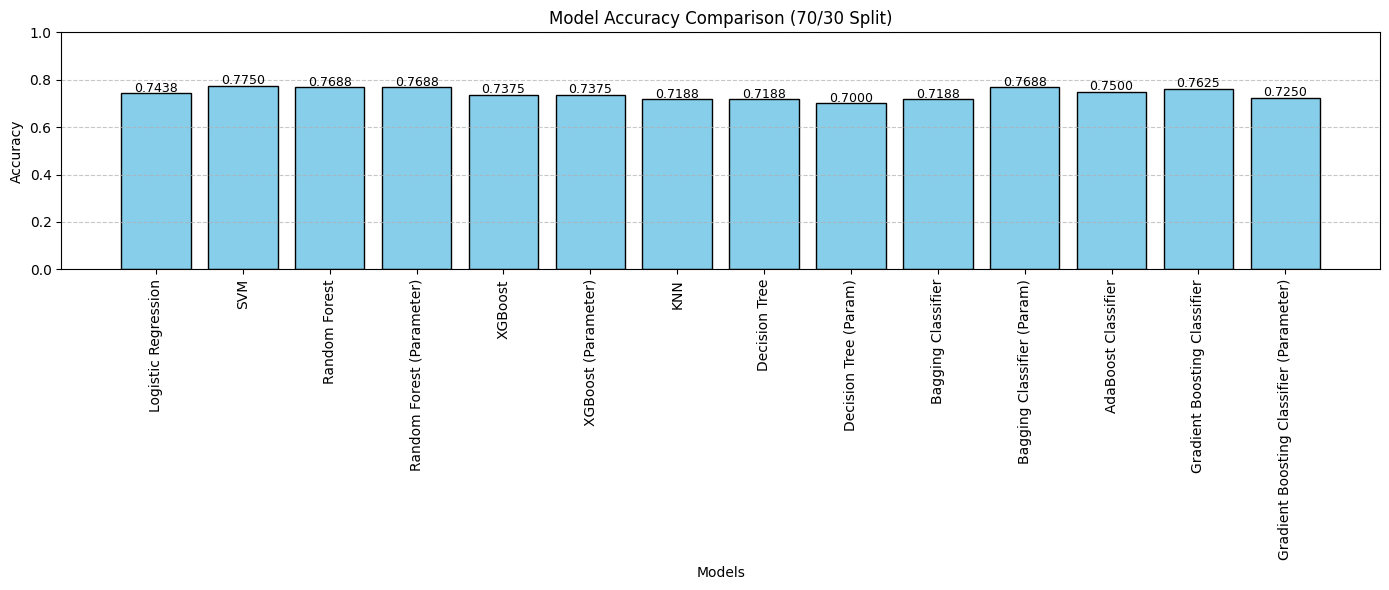

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf


RANDOM_STATE = 42
tf.random.set_seed(RANDOM_STATE)


X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)


model_accuracies = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
logreg.fit(X_train, y_train)
model_accuracies["Logistic Regression"] = accuracy_score(y_test, logreg.predict(X_test))

# Support Vector Machine (SVM)
from sklearn.svm import SVC

# SVM (Default, which is RBF kernel with C=1.0, gamma='scale')
svm = SVC(kernel='rbf', random_state=RANDOM_STATE)
svm.fit(X_train, y_train)
model_accuracies["SVM"] = accuracy_score(y_test, svm.predict(X_test))

# Random Forest (Default)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
model_accuracies["Random Forest"] = accuracy_score(y_test, rf.predict(X_test))

# Random Forest (Tuned)
rf_parameter = RandomForestClassifier(
    n_estimators=200, max_depth=10, min_samples_split=5, random_state=RANDOM_STATE
)
rf_parameter.fit(X_train, y_train)
model_accuracies["Random Forest (Parameter)"] = accuracy_score(y_test, rf_parameter.predict(X_test))

# XGBoost (Default)
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=RANDOM_STATE)
xgb.fit(X_train, y_train)
model_accuracies["XGBoost"] = accuracy_score(y_test, xgb.predict(X_test))

# XGBoost (Tuned)
xgb_parameter = XGBClassifier(
    n_estimators=300, max_depth=6, learning_rate=0.1, eval_metric='logloss',
    use_label_encoder=False, random_state=RANDOM_STATE
)
xgb_parameter.fit(X_train, y_train)
model_accuracies["XGBoost (Parameter)"] = accuracy_score(y_test, xgb_parameter.predict(X_test))

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
model_accuracies["KNN"] = accuracy_score(y_test, knn.predict(X_test))

# Decision Tree (Default)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)
model_accuracies["Decision Tree"] = accuracy_score(y_test, dt.predict(X_test))

# Decision Tree (Tuned)
dt_parameter = DecisionTreeClassifier(max_depth=8, min_samples_split=4, random_state=RANDOM_STATE)
dt_parameter.fit(X_train, y_train)
model_accuracies["Decision Tree (Param)"] = accuracy_score(y_test, dt_parameter.predict(X_test))

# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(random_state=RANDOM_STATE)
bag.fit(X_train, y_train)
model_accuracies["Bagging Classifier"] = accuracy_score(y_test, bag.predict(X_test))

# Bagging Classifier (Tuned)
bag_parameter = BaggingClassifier(n_estimators=150, random_state=RANDOM_STATE)
bag_parameter.fit(X_train, y_train)
model_accuracies["Bagging Classifier (Param)"] = accuracy_score(y_test, bag_parameter.predict(X_test))

# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=RANDOM_STATE)
ada.fit(X_train, y_train)
model_accuracies["AdaBoost Classifier"] = accuracy_score(y_test, ada.predict(X_test))

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb.fit(X_train, y_train)
model_accuracies["Gradient Boosting Classifier"] = accuracy_score(y_test, gb.predict(X_test))

# Gradient Boosting Classifier (Tuned)
gb_parameter = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=RANDOM_STATE)
gb_parameter.fit(X_train, y_train)
model_accuracies["Gradient Boosting Classifier (Parameter)"] = accuracy_score(y_test, gb_parameter.predict(X_test))



plt.figure(figsize=(14, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue', edgecolor='black')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison (70/30 Split)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## Train,Test for 60-40

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:51:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:51:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


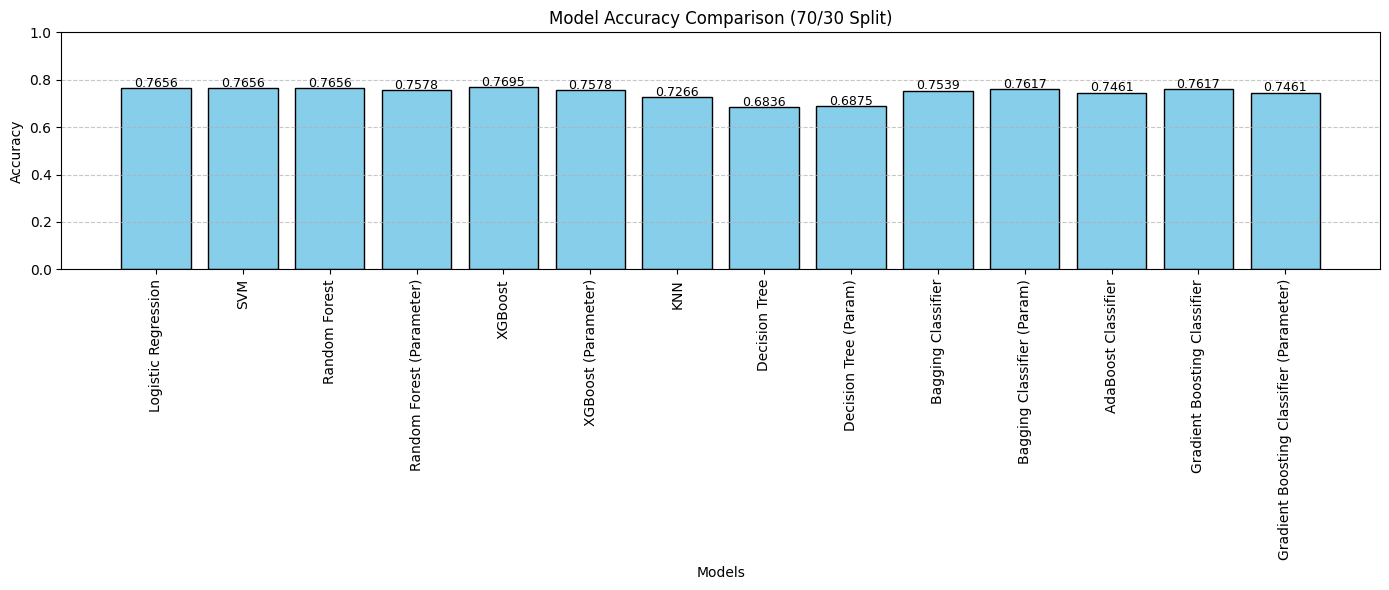

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf


RANDOM_STATE = 42
tf.random.set_seed(RANDOM_STATE)


X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=RANDOM_STATE, stratify=y
)


model_accuracies = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
logreg.fit(X_train, y_train)
model_accuracies["Logistic Regression"] = accuracy_score(y_test, logreg.predict(X_test))

# Support Vector Machine (SVM)
from sklearn.svm import SVC

# SVM (Default, which is RBF kernel with C=1.0, gamma='scale')
svm = SVC(kernel='rbf', random_state=RANDOM_STATE)
svm.fit(X_train, y_train)
model_accuracies["SVM"] = accuracy_score(y_test, svm.predict(X_test))

# Random Forest (Default)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
model_accuracies["Random Forest"] = accuracy_score(y_test, rf.predict(X_test))

# Random Forest (Tuned)
rf_parameter = RandomForestClassifier(
    n_estimators=200, max_depth=10, min_samples_split=5, random_state=RANDOM_STATE
)
rf_parameter.fit(X_train, y_train)
model_accuracies["Random Forest (Parameter)"] = accuracy_score(y_test, rf_parameter.predict(X_test))

# XGBoost (Default)
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=RANDOM_STATE)
xgb.fit(X_train, y_train)
model_accuracies["XGBoost"] = accuracy_score(y_test, xgb.predict(X_test))

# XGBoost (Tuned)
xgb_parameter = XGBClassifier(
    n_estimators=300, max_depth=6, learning_rate=0.1, eval_metric='logloss',
    use_label_encoder=False, random_state=RANDOM_STATE
)
xgb_parameter.fit(X_train, y_train)
model_accuracies["XGBoost (Parameter)"] = accuracy_score(y_test, xgb_parameter.predict(X_test))

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
model_accuracies["KNN"] = accuracy_score(y_test, knn.predict(X_test))

# Decision Tree (Default)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)
model_accuracies["Decision Tree"] = accuracy_score(y_test, dt.predict(X_test))

# Decision Tree (Tuned)
dt_parameter = DecisionTreeClassifier(max_depth=8, min_samples_split=4, random_state=RANDOM_STATE)
dt_parameter.fit(X_train, y_train)
model_accuracies["Decision Tree (Param)"] = accuracy_score(y_test, dt_parameter.predict(X_test))

# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(random_state=RANDOM_STATE)
bag.fit(X_train, y_train)
model_accuracies["Bagging Classifier"] = accuracy_score(y_test, bag.predict(X_test))

# Bagging Classifier (Tuned)
bag_parameter = BaggingClassifier(n_estimators=150, random_state=RANDOM_STATE)
bag_parameter.fit(X_train, y_train)
model_accuracies["Bagging Classifier (Param)"] = accuracy_score(y_test, bag_parameter.predict(X_test))

# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=RANDOM_STATE)
ada.fit(X_train, y_train)
model_accuracies["AdaBoost Classifier"] = accuracy_score(y_test, ada.predict(X_test))

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb.fit(X_train, y_train)
model_accuracies["Gradient Boosting Classifier"] = accuracy_score(y_test, gb.predict(X_test))

# Gradient Boosting Classifier (Tuned)
gb_parameter = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=RANDOM_STATE)
gb_parameter.fit(X_train, y_train)
model_accuracies["Gradient Boosting Classifier (Parameter)"] = accuracy_score(y_test, gb_parameter.predict(X_test))



plt.figure(figsize=(14, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue', edgecolor='black')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison (70/30 Split)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for i, v in enumerate(model_accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

Naive bayes

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75390625


# Variance Inflation Factor (VIF)

In [ ]:
x = df.drop(['Outcome'], axis=1)

In [ ]:
x

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
5                       0.201   30  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[639 rows x 8 columns]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
vif_data

feature        VIF
0               Pregnancies   3.484846
1                   Glucose  20.947945
2             BloodPressure  37.356434
3             SkinThickness   4.430741
4                   Insulin   2.554788
5                       BMI  30.960665
6  DiabetesPedigreeFunction   4.100191
7                       Age  16.588756

In [ ]:
x = df.drop(['Outcome','BloodPressure'], axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
vif_data

feature        VIF
0               Pregnancies   3.477560
1                   Glucose  18.481938
2             SkinThickness   4.423879
3                   Insulin   2.498530
4                       BMI  21.067019
5  DiabetesPedigreeFunction   4.079127
6                       Age  14.504382

In [ ]:
x = df.drop(['Outcome','BloodPressure','BMI'], axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
vif_data

feature        VIF
0               Pregnancies   3.465296
1                   Glucose  12.118370
2             SkinThickness   3.350005
3                   Insulin   2.421666
4  DiabetesPedigreeFunction   3.868394
5                       Age  13.458238

In [ ]:
x = df.drop(['Outcome','BloodPressure','BMI','Glucose','Age'], axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [ ]:
vif_data

feature       VIF
0               Pregnancies  1.832635
1             SkinThickness  3.086644
2                   Insulin  2.289419
3  DiabetesPedigreeFunction  2.810155

# Models Performing After VIF

# Logistic Regression

In [ ]:
x = df.drop(['Outcome','BloodPressure','BMI','Glucose','Age'], axis=1)
print(x)
y = df['Outcome']
print(y)

     Pregnancies  SkinThickness  Insulin  DiabetesPedigreeFunction
0              6             35        0                     0.627
1              1             29        0                     0.351
2              8              0        0                     0.672
3              1             23       94                     0.167
5              5              0        0                     0.201
..           ...            ...      ...                       ...
763           10             48      180                     0.171
764            2             27        0                     0.340
765            5             23      112                     0.245
766            1              0        0                     0.349
767            1             31        0                     0.315

[639 rows x 4 columns]
0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state = 42)

In [ ]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print(predictions)

[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8072916666666666

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       132
           1       0.81      0.50      0.62        60

    accuracy                           0.81       192
   macro avg       0.81      0.72      0.74       192
weighted avg       0.81      0.81      0.79       192



# SVM_Classifier

In [ ]:
x = df.drop(['Outcome','BloodPressure','BMI','Glucose','Age'], axis=1)
print(x)
y = df['Outcome']
print(y)

     Pregnancies  SkinThickness  Insulin  DiabetesPedigreeFunction
0              6             35        0                     0.627
1              1             29        0                     0.351
2              8              0        0                     0.672
3              1             23       94                     0.167
5              5              0        0                     0.201
..           ...            ...      ...                       ...
763           10             48      180                     0.171
764            2             27        0                     0.340
765            5             23      112                     0.245
766            1              0        0                     0.349
767            1             31        0                     0.315

[639 rows x 4 columns]
0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3, random_state= 46)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
svm

Predicted  Actual
642          0       1
475          0       0
573          0       0
149          0       0
268          0       0
..         ...     ...
273          0       0
166          0       0
605          0       0
635          0       1
68           0       0

[192 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7395833333333334

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       142
           1       0.00      0.00      0.00        50

    accuracy                           0.74       192
   macro avg       0.37      0.50      0.43       192
weighted avg       0.55      0.74      0.63       192



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# KNN_Classifier

In [ ]:
x = df.drop(['Outcome','BloodPressure','BMI','Glucose','Age'], axis=1)
print(x)
y = df['Outcome']
print(y)

     Pregnancies  SkinThickness  Insulin  DiabetesPedigreeFunction
0              6             35        0                     0.627
1              1             29        0                     0.351
2              8              0        0                     0.672
3              1             23       94                     0.167
5              5              0        0                     0.201
..           ...            ...      ...                       ...
763           10             48      180                     0.171
764            2             27        0                     0.340
765            5             23      112                     0.245
766            1              0        0                     0.349
767            1             31        0                     0.315

[639 rows x 4 columns]
0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .3, random_state= 46)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
knn

Predicted  Actual
642          0       1
475          0       0
573          0       0
149          0       0
268          0       0
..         ...     ...
273          0       0
166          0       0
605          0       0
635          0       1
68           0       0

[192 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7239583333333334

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       142
           1       0.46      0.36      0.40        50

    accuracy                           0.72       192
   macro avg       0.63      0.61      0.61       192
weighted avg       0.71      0.72      0.71       192



# Model Comparision

In [ ]:
import pandas as pd

# ML Model Accuracy results (from your table)
data = {
    "Algorithm": ["Logistic Regression", "Decision Tree", "KNN", "SVM", "Bagging",
                  "AdaBoost", "Random Forest", "Gradient Boost", "XGBoost"],
    "60-40": [0.7656, 0.6836, 0.7266, 0.7656, 0.7539, 0.7461, 0.7656, 0.7617, 0.7695],
    "70-30": [0.8072, 0.7240, 0.8300, 0.8300, 0.8020, 0.8020, 0.8020, 0.7709, 0.7709],
    "75-25": [0.7438, 0.7188, 0.7188, 0.7750, 0.7188, 0.7500, 0.7688, 0.7625, 0.7375],
    "80-20": [0.7448, 0.7188, 0.7135, 0.7760, 0.7812, 0.7656, 0.7656, 0.7760, 0.7604]
}

df_ml = pd.DataFrame(data)
print(df_ml)

             Algorithm   60-40   70-30   75-25   80-20
0  Logistic Regression  0.7656  0.8072  0.7438  0.7448
1        Decision Tree  0.6836  0.7240  0.7188  0.7188
2                  KNN  0.7266  0.8300  0.7188  0.7135
3                  SVM  0.7656  0.8300  0.7750  0.7760
4              Bagging  0.7539  0.8020  0.7188  0.7812
5             AdaBoost  0.7461  0.8020  0.7500  0.7656
6        Random Forest  0.7656  0.8020  0.7688  0.7656
7       Gradient Boost  0.7617  0.7709  0.7625  0.7760
8              XGBoost  0.7695  0.7709  0.7375  0.7604


In [ ]:
df_ml["Average"] = df_ml[["60-40", "70-30", "75-25", "80-20"]].mean(axis=1)
print(df_ml.sort_values(by="Average", ascending=False))

             Algorithm   60-40   70-30   75-25   80-20   Average
3                  SVM  0.7656  0.8300  0.7750  0.7760  0.786650
6        Random Forest  0.7656  0.8020  0.7688  0.7656  0.775500
7       Gradient Boost  0.7617  0.7709  0.7625  0.7760  0.767775
5             AdaBoost  0.7461  0.8020  0.7500  0.7656  0.765925
0  Logistic Regression  0.7656  0.8072  0.7438  0.7448  0.765350
4              Bagging  0.7539  0.8020  0.7188  0.7812  0.763975
8              XGBoost  0.7695  0.7709  0.7375  0.7604  0.759575
2                  KNN  0.7266  0.8300  0.7188  0.7135  0.747225
1        Decision Tree  0.6836  0.7240  0.7188  0.7188  0.711300


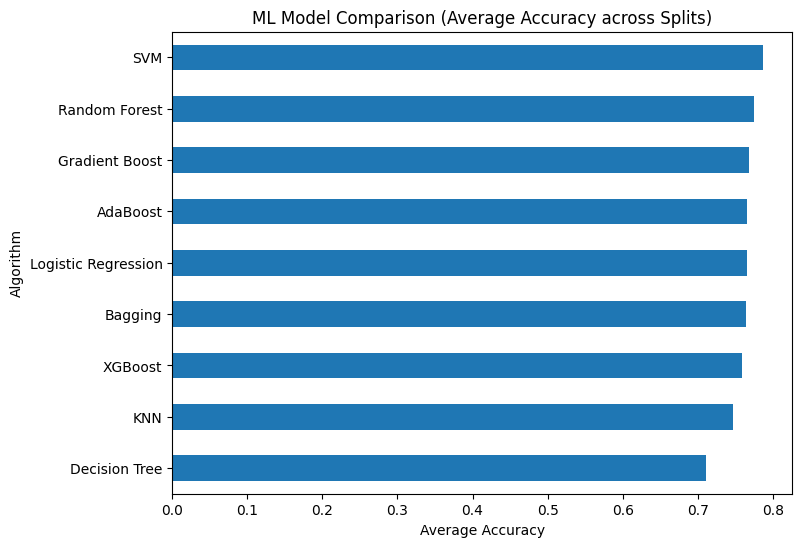

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for average accuracy
df_ml.set_index("Algorithm")["Average"].sort_values().plot(kind="barh", figsize=(8,6))
plt.xlabel("Average Accuracy")
plt.title("ML Model Comparison (Average Accuracy across Splits)")
plt.show()


# Comparing Before and After Vif

Comparison of Model Accuracies (Before vs After VIF)
+----+---------------------+--------------+-------------+
|    | Model               |   Before VIF |   After VIF |
+====+=====================+==============+=============+
|  0 | Logistic Regression |        0.808 |        0.81 |
+----+---------------------+--------------+-------------+
|  1 | SVM                 |        0.83  |        0.74 |
+----+---------------------+--------------+-------------+
|  2 | KNN                 |        0.83  |        0.72 |
+----+---------------------+--------------+-------------+


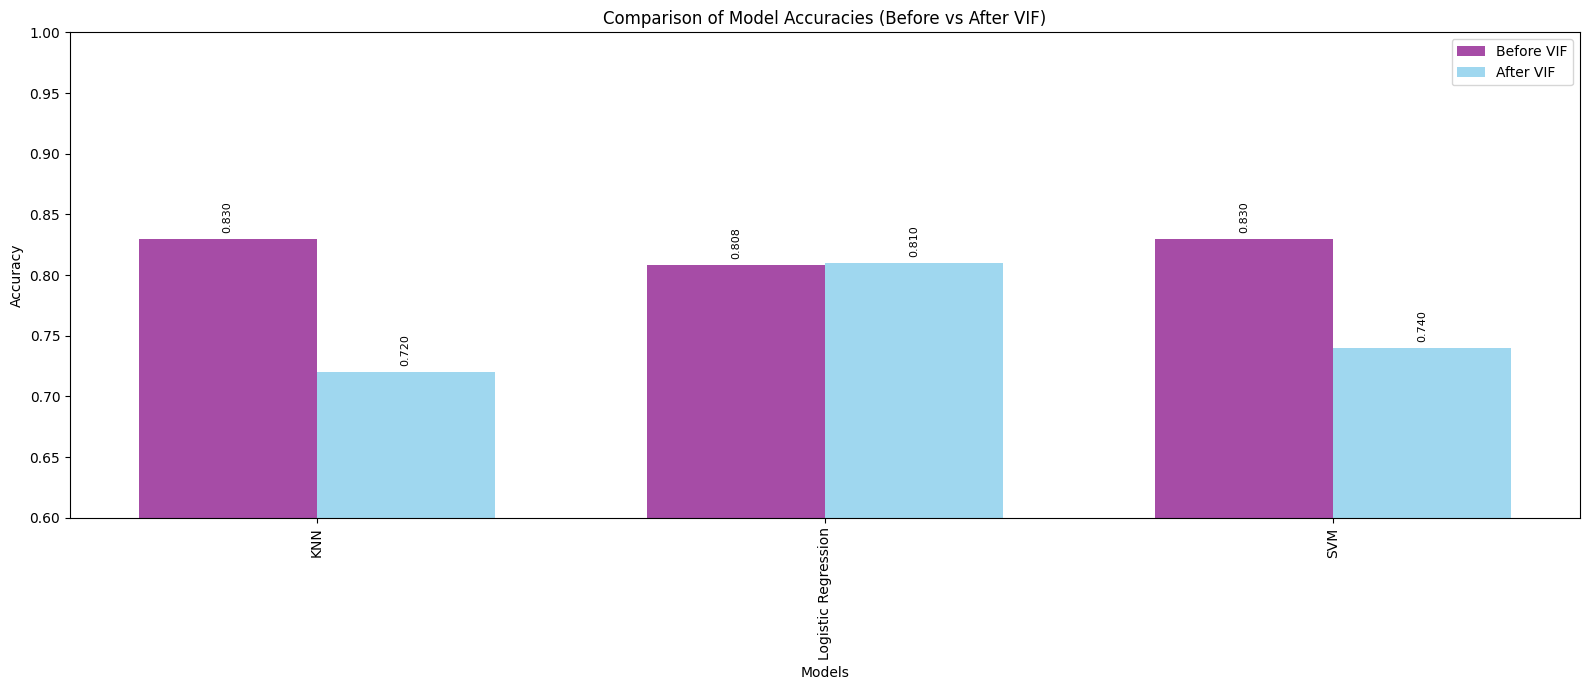

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate

# =======================
# 1. Accuracies Before VIF
# =======================
before_vif = {
    "Logistic Regression": 0.808,
    "SVM": 0.83,
    "KNN": 0.83}

# =======================
# 2. Accuracies After VIF
# =======================
after_vif = {
    "Logistic Regression": 0.81,
    "SVM":0.74,
    "KNN":0.72
}

# =======================
# 3. Create DataFrame and Table
# =======================
comparison_data = {
    "Model": list(before_vif.keys()),
    "Before VIF": list(before_vif.values()),
    "After VIF": list(after_vif.values())
}
comparison_df = pd.DataFrame(comparison_data).round(3)

print("Comparison of Model Accuracies (Before vs After VIF)")
print(tabulate(comparison_df, headers="keys", tablefmt="grid"))

# =======================
# 4. Plot (existing plot code remains)
# =======================
models = sorted(set(before_vif.keys()).union(set(after_vif.keys())))

before_scores = [before_vif.get(m, np.nan) for m in models]
after_scores = [after_vif.get(m, np.nan) for m in models]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(16, 7))
bars1 = plt.bar(x - width/2, before_scores, width, label="Before VIF", color="purple", alpha=0.7)
bars2 = plt.bar(x + width/2, after_scores, width, label="After VIF", color="skyblue", alpha=0.8)

# Labels and title
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.title("Comparison of Model Accuracies (Before vs After VIF)")
plt.xticks(x, models, rotation=90)
plt.ylim(0.6, 1.0)
plt.legend()

# Annotate values on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    if not np.isnan(height):
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f"{height:.3f}",
                 ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()

# ANN

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
634           10      101             76             48      180  32.9   
635            2      122             70             27        0  36.8   
636            5      121             72             23      112  26.2   
637            1      126             60              0        0  30.1   
638            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       0.201   30        0  
..                        ...  ...      ...  
634                     0.171   63        0  
635                     0.340   27        0  
636                     0.245   30        0  
637                     0.349   47        1  
638                     0.315   23        0  

[639 rows x 9 columns]

In [ ]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]
x

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
634           10      101             76             48      180  32.9   
635            2      122             70             27        0  36.8   
636            5      121             72             23      112  26.2   
637            1      126             60              0        0  30.1   
638            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       0.201   30  
..                        ...  ...  
634                     0.171   63  
635                     0.340   27  
636                     0.245   30  
637                     0.349   47  
638                     0.315   23  

[639 rows x 8 columns]

In [ ]:
y

0      1
1      0
2      1
3      0
4      0
      ..
634    0
635    0
636    0
637    1
638    0
Name: Outcome, Length: 639, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.30, random_state=46)

In [ ]:
#ReLU + Adam
tf.random.set_seed(42)

# STEP1: Creating the model

model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model1.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model1.fit(x_train, y_train, epochs= 250)

Epoch 1/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6760 - loss: 0.8650 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6760 - loss: 0.7207 - precision: 0.0000e+00 - recall: 0.0000e+00  
Epoch 3/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6760 - loss: 0.6998 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 4/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6760 - loss: 0.6930 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 5/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6760 - loss: 0.6889 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 6/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6760 - loss: 0.6852 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 7/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6760 - loss: 0.6816 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 8/250
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6760 - loss: 0.678

<Axes: >

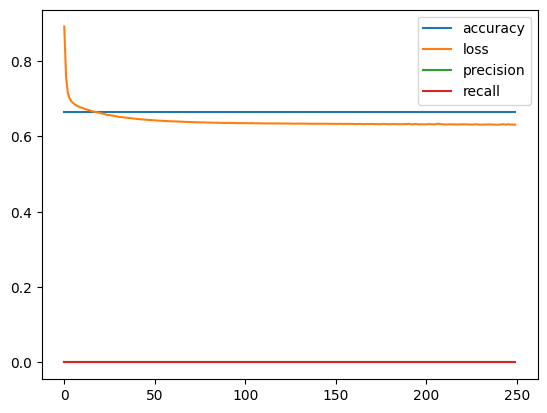

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model1.summary();

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            63 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377 (1.48 KB)

 Trainable params: 125 (500.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 252 (1012.00 B)

In [ ]:
model1.evaluate(x_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7106 - loss: 0.5958 - precision: 0.0000e+00 - recall: 0.0000e+00  


[0.5823350548744202, 0.7395833134651184, 0.0, 0.0]

In [ ]:
#SGD + tanh
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='tanh'),
    tf.keras.layers.Dense(5, activation='tanh'),
    tf.keras.layers.Dense(1, activation='tanh'),
    tf.keras.layers.Dense(1, activation='linear')
])

model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')]
)

history2 = model2.fit(x_train, y_train, epochs=500,verbose=0)

In [ ]:
model2.evaluate(x_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2894 - loss: 11.3293 - precision: 0.2894 - recall: 1.0000  


[11.790721893310547, 0.2604166567325592, 0.2604166567325592, 1.0]

In [ ]:
#RMSprop + sigmoid
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')]
)

history3 = model3.fit(x_train, y_train, epochs=550,verbose=0)

In [ ]:
model3.evaluate(x_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7028 - loss: 0.5111 - precision: 0.4564 - recall: 0.1887  


[0.49855783581733704, 0.71875, 0.4000000059604645, 0.1599999964237213]

In [ ]:
#ReLU + Adam(higher LR)
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')]
)

history4 = model4.fit(x_train, y_train, epochs=300)

Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6674 - loss: 3.7842 - precision: 0.3101 - recall: 0.0484        
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5449 - loss: 0.6950 - precision: 0.3213 - recall: 0.3683 
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5507 - loss: 0.6908 - precision: 0.1731 - recall: 0.1037         
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5811 - loss: 0.6835 - precision: 0.1893 - recall: 0.0899         
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6264 - loss: 0.6749 - precision: 0.1789 - recall: 0.0407         
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6760 - loss: 0.6644 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6760 - loss: 0.6548 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6760 - loss: 0.6489 - preci

In [ ]:
model4.evaluate(x_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6824 - loss: 0.5284 - precision: 0.4727 - recall: 0.8922  


[0.5257912278175354, 0.6875, 0.44897958636283875, 0.8799999952316284]

In [ ]:
import pandas as pd

# Evaluate all models
results = []

# Model 1
res1 = model1.evaluate(x_test, y_test, verbose=0)
results.append(["Model 1: RELU, relu, 24-12-5-1, 100 epochs", res1[0], res1[1], res1[2], res1[3]])

# Model 2
res2 = model2.evaluate(x_test, y_test, verbose=0)
results.append(["Model 2: tanh, tanh, 10-8-7-1, 50 epochs", res2[0], res2[1], res2[2], res2[3]])

# Model 3
res3 = model3.evaluate(x_test, y_test, verbose=0)
results.append(["Model 3: RMSprop, sigmoid, 22-15-8-1, 100 epochs", res3[0], res3[1], res3[2], res3[3]])

# Model 4
res4 = model4.evaluate(x_test, y_test, verbose=0)
results.append(["Model 4: Adam (0.01 LR), relu, 22-15-8-1, 300 epochs", res4[0], res4[1], res4[2], res4[3]])

# Create DataFrame
df = pd.DataFrame(results, columns=["Model", "Loss", "Accuracy", "Precision", "Recall"])

# Display table
print(df)


                                               Model       Loss  Accuracy  \
0         Model 1: RELU, relu, 24-12-5-1, 100 epochs   0.582335  0.739583   
1           Model 2: tanh, tanh, 10-8-7-1, 50 epochs  11.790722  0.260417   
2   Model 3: RMSprop, sigmoid, 22-15-8-1, 100 epochs   0.498558  0.718750   
3  Model 4: Adam (0.01 LR), relu, 22-15-8-1, 300 ...   0.525791  0.687500   

   Precision  Recall  
0   0.000000    0.00  
1   0.260417    1.00  
2   0.400000    0.16  
3   0.448980    0.88  


In [ ]:
#80-20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=46)

In [ ]:
#ReLU + Adam
tf.random.set_seed(42)

# STEP1: Creating the model

model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model1.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model1.fit(x_train, y_train, epochs= 150, verbose=0)

#SGD + tanh
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='tanh'),
    tf.keras.layers.Dense(6, activation='tanh'),
    tf.keras.layers.Dense(2, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')]
)

history2 = model2.fit(x_train, y_train, epochs=200, verbose=0)

#RMSprop + sigmoid
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')]
)

history3 = model3.fit(x_train, y_train, epochs=300, verbose=0)

#ReLU + Adam(hiher LR)
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')]
)

history4 = model4.fit(x_train, y_train, epochs=500, verbose=0)

In [ ]:
import pandas as pd

# Evaluate all models
results = []

# Model 1
res1 = model1.evaluate(x_test, y_test, verbose=0)
results.append(["Model 1: Adam, relu, 24-12-5-1, 250 epochs", res1[0], res1[1], res1[2], res1[3]])

# Model 2
res2 = model2.evaluate(x_test, y_test, verbose=0)
results.append(["Model 2: SGD, tanh, 24-12-5-1, 200 epochs", res2[0], res2[1], res2[2], res2[3]])

# Model 3
res3 = model3.evaluate(x_test, y_test, verbose=0)
results.append(["Model 3: RMSprop, sigmoid, 22-15-8-1, 150 epochs", res3[0], res3[1], res3[2], res3[3]])

# Model 4
res4 = model4.evaluate(x_test, y_test, verbose=0)
results.append(["Model 4: Adam (0.01 LR), relu, 22-15-8-1, 300 epochs", res4[0], res4[1], res4[2], res4[3]])

# Create DataFrame
df = pd.DataFrame(results, columns=["Model", "Loss", "Accuracy", "Precision", "Recall"])

# Display table
print(df)

                                               Model      Loss  Accuracy  \
0         Model 1: Adam, relu, 24-12-5-1, 250 epochs  0.602223  0.710938   
1          Model 2: SGD, tanh, 24-12-5-1, 200 epochs  0.602651  0.710938   
2   Model 3: RMSprop, sigmoid, 22-15-8-1, 150 epochs  0.557511  0.695312   
3  Model 4: Adam (0.01 LR), relu, 22-15-8-1, 300 ...  0.603351  0.710938   

   Precision    Recall  
0   0.000000  0.000000  
1   0.000000  0.000000  
2   0.333333  0.054054  
3   0.000000  0.000000  


In [ ]:
#75-25
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=46)

In [ ]:
#ReLU + Adam
tf.random.set_seed(42)

# STEP1: Creating the model

model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model1.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model1.fit(x_train, y_train, epochs= 250, verbose=0)

#SGD + tanh
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='tanh'),
    tf.keras.layers.Dense(5, activation='tanh'),
    tf.keras.layers.Dense(2, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')]
)

history2 = model2.fit(x_train, y_train, epochs=500, verbose=0)

#RMSprop + sigmoid
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(3, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')
])

model3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')]
)

history3 = model3.fit(x_train, y_train, epochs=650, verbose=0)

#ReLU + Adam(hiher LR)
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')]
)

history4 = model4.fit(x_train, y_train, epochs=300, verbose=0)

In [ ]:
import pandas as pd

# Evaluate all models
results = []

# Model 1
res1 = model1.evaluate(x_test, y_test, verbose=0)
results.append(["Model 1: Adam, relu, 24-12-5-1, 250 epochs", res1[0], res1[1], res1[2], res1[3]])

# Model 2
res2 = model2.evaluate(x_test, y_test, verbose=0)
results.append(["Model 2: SGD, tanh, 24-12-5-1, 200 epochs", res2[0], res2[1], res2[2], res2[3]])

# Model 3
res3 = model3.evaluate(x_test, y_test, verbose=0)
results.append(["Model 3: RMSprop, sigmoid, 22-15-8-1, 150 epochs", res3[0], res3[1], res3[2], res3[3]])

# Model 4
res4 = model4.evaluate(x_test, y_test, verbose=0)
results.append(["Model 4: Adam (0.01 LR), relu, 22-15-8-1, 300 epochs", res4[0], res4[1], res4[2], res4[3]])

# Create DataFrame
df = pd.DataFrame(results, columns=["Model", "Loss", "Accuracy", "Precision", "Recall"])

# Display table
print(df)

                                               Model      Loss  Accuracy  \
0         Model 1: Adam, relu, 24-12-5-1, 250 epochs  0.510918   0.78125   
1          Model 2: SGD, tanh, 24-12-5-1, 200 epochs  0.586191   0.73750   
2   Model 3: RMSprop, sigmoid, 22-15-8-1, 150 epochs  0.513111   0.75625   
3  Model 4: Adam (0.01 LR), relu, 22-15-8-1, 300 ...  4.231000   0.73750   

   Precision    Recall  
0   0.888889  0.190476  
1   0.000000  0.000000  
2   0.578947  0.261905  
3   0.000000  0.000000  


In [ ]:
#60-40
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=46)

In [ ]:
#ReLU + Adam
tf.random.set_seed(42)

# STEP1: Creating the model

model1= tf.keras.Sequential([
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(3, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model1.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')
              ]
              )

# STEP1: Fit the model

history= model1.fit(x_train, y_train, epochs= 250, verbose=0)

#SGD + tanh
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1, activation='linear')
])

model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')]
)

history2 = model2.fit(x_train, y_train, epochs=600, verbose=0)

#RMSprop + sigmoid
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='sigmoid'),
    tf.keras.layers.Dense(6, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='linear')
])

model3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')]
)

history3 = model3.fit(x_train, y_train, epochs=750, verbose=0)

#ReLU + Adam(hiher LR)
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall')]
)

history4 = model4.fit(x_train, y_train, epochs=300, verbose=0)

In [ ]:
import pandas as pd

# Evaluate all models
results = []

# Model 1
res1 = model1.evaluate(x_test, y_test, verbose=0)
results.append(["Model 1: Adam, relu, 24-12-5-1, 250 epochs", res1[0], res1[1], res1[2], res1[3]])

# Model 2
res2 = model2.evaluate(x_test, y_test, verbose=0)
results.append(["Model 2: SGD, tanh, 24-12-5-1, 200 epochs", res2[0], res2[1], res2[2], res2[3]])

# Model 3
res3 = model3.evaluate(x_test, y_test, verbose=0)
results.append(["Model 3: RMSprop, sigmoid, 22-15-8-1, 150 epochs", res3[0], res3[1], res3[2], res3[3]])

# Model 4
res4 = model4.evaluate(x_test, y_test, verbose=0)
results.append(["Model 4: Adam (0.01 LR), relu, 22-15-8-1, 300 epochs", res4[0], res4[1], res4[2], res4[3]])

# Create DataFrame
df = pd.DataFrame(results, columns=["Model", "Loss", "Accuracy", "Precision", "Recall"])

# Display table
print(df)

                                               Model       Loss  Accuracy  \
0         Model 1: Adam, relu, 24-12-5-1, 250 epochs   0.484022  0.777344   
1          Model 2: SGD, tanh, 24-12-5-1, 200 epochs  11.707688  0.265625   
2   Model 3: RMSprop, sigmoid, 22-15-8-1, 150 epochs   4.281369  0.734375   
3  Model 4: Adam (0.01 LR), relu, 22-15-8-1, 300 ...   4.281369  0.734375   

   Precision    Recall  
0   0.587302  0.544118  
1   0.265625  1.000000  
2   0.000000  0.000000  
3   0.000000  0.000000  
